In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import numpy as np

In [2]:
df = pd.read_csv( os.path.join('csv_label', 'tsflesh.csv') )
df

,0__variance_larger_than_standard_deviation,0__has_duplicate_max,0__has_duplicate_min,0__has_duplicate,0__sum_values,0__abs_energy,0__mean_abs_change,0__mean_change,0__mean_second_derivative_central,0__median,...,0__query_similarity_count__query_None__threshold_0.0,"0__matrix_profile__feature_""min""__threshold_0.98","0__matrix_profile__feature_""max""__threshold_0.98","0__matrix_profile__feature_""mean""__threshold_0.98","0__matrix_profile__feature_""median""__threshold_0.98","0__matrix_profile__feature_""25""__threshold_0.98","0__matrix_profile__feature_""75""__threshold_0.98",0__mean_n_absolute_max__number_of_maxima_7,original,label
0,0.0,0.0,1.0,1.0,1093.4,59795.32,0.284211,-0.094737,0.022222,54.95,...,0.0,0.89362,2.407434,1.533555,1.194127,1.019286,1.779321,55.600000,55.2,0
1,0.0,0.0,1.0,1.0,1094.7,59935.85,0.278947,-0.100000,-0.013889,54.95,...,0.0,0.89362,2.407434,1.533555,1.194127,1.019286,1.779321,55.600000,54.7,0
2,0.0,0.0,0.0,1.0,1096.3,60107.37,0.294737,-0.084211,-0.019444,54.95,...,0.0,0.89362,2.407434,1.533555,1.194127,1.019286,1.779321,55.600000,54.4,0
3,0.0,0.0,0.0,1.0,1098.0,60289.78,0.278947,-0.068421,-0.008333,54.95,...,0.0,0.89362,2.407434,1.533555,1.194127,1.019286,1.779321,55.600000,54.5,0
4,0.0,0.0,0.0,1.0,1099.1,60408.03,0.268421,-0.036842,-0.016667,54.95,...,0.0,0.89362,2.407434,1.533555,1.194127,1.019286,1.779321,55.600000,54.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107989,0.0,0.0,0.0,1.0,879.4,38668.30,0.205263,-0.015789,0.013889,43.95,...,0.0,0.89362,2.407434,1.533555,1.194127,1.019286,1.779321,44.228571,44.3,0
107990,0.0,0.0,0.0,1.0,879.7,38694.79,0.205263,-0.015789,-0.011111,43.95,...,0.0,0.89362,2.407434,1.533555,1.194127,1.019286,1.779321,44.257143,44.3,0
107991,0.0,0.0,0.0,1.0,880.0,38721.28,0.184211,0.005263,0.013889,43.95,...,0.0,0.89362,2.407434,1.533555,1.194127,1.019286,1.779321,44.285714,44.3,0
107992,0.0,0.0,0.0,1.0,880.8,38792.96,0.205263,-0.068421,0.027778,43.95,...,0.0,0.89362,2.407434,1.533555,1.194127,1.019286,1.779321,44.400000,45.2,0


In [6]:
N_val=17999*2
test=df[:N_val][df.columns[:-2]].values
train=df[N_val:][df.columns[:-2]].values

test_for_plot = df[:N_val][df.columns[-2]].values
label=df[:N_val][df.columns[-1]].values*100
label_index=range(len(label))

In [7]:
from sklearn.ensemble import IsolationForest
# IsolationForest
model = IsolationForest(n_estimators=100, random_state=42)
model.fit(train)
score=model.score_samples(test)
score

array([-0.43125398, -0.43960604, -0.42389933, ..., -0.42508324,
       -0.41981089, -0.40510813])

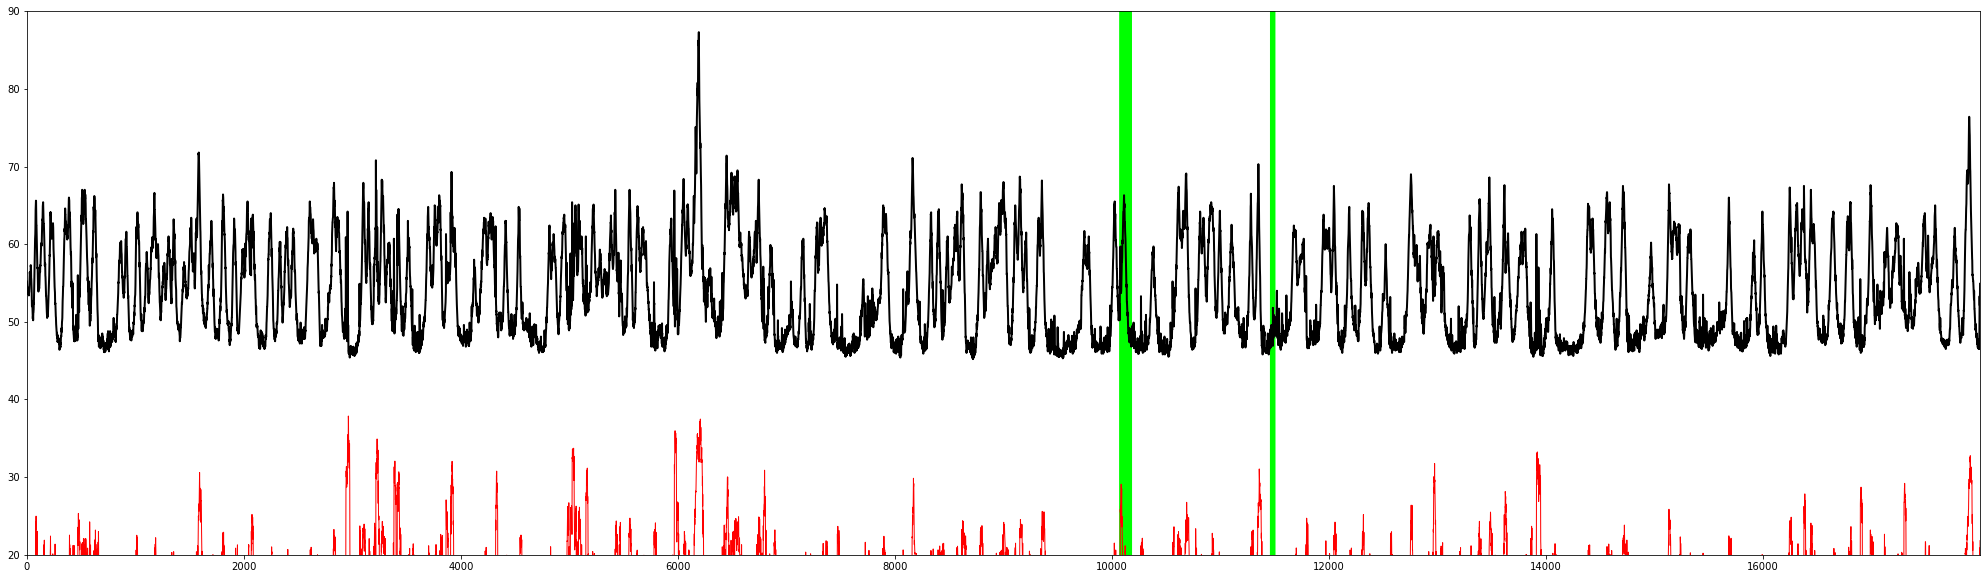

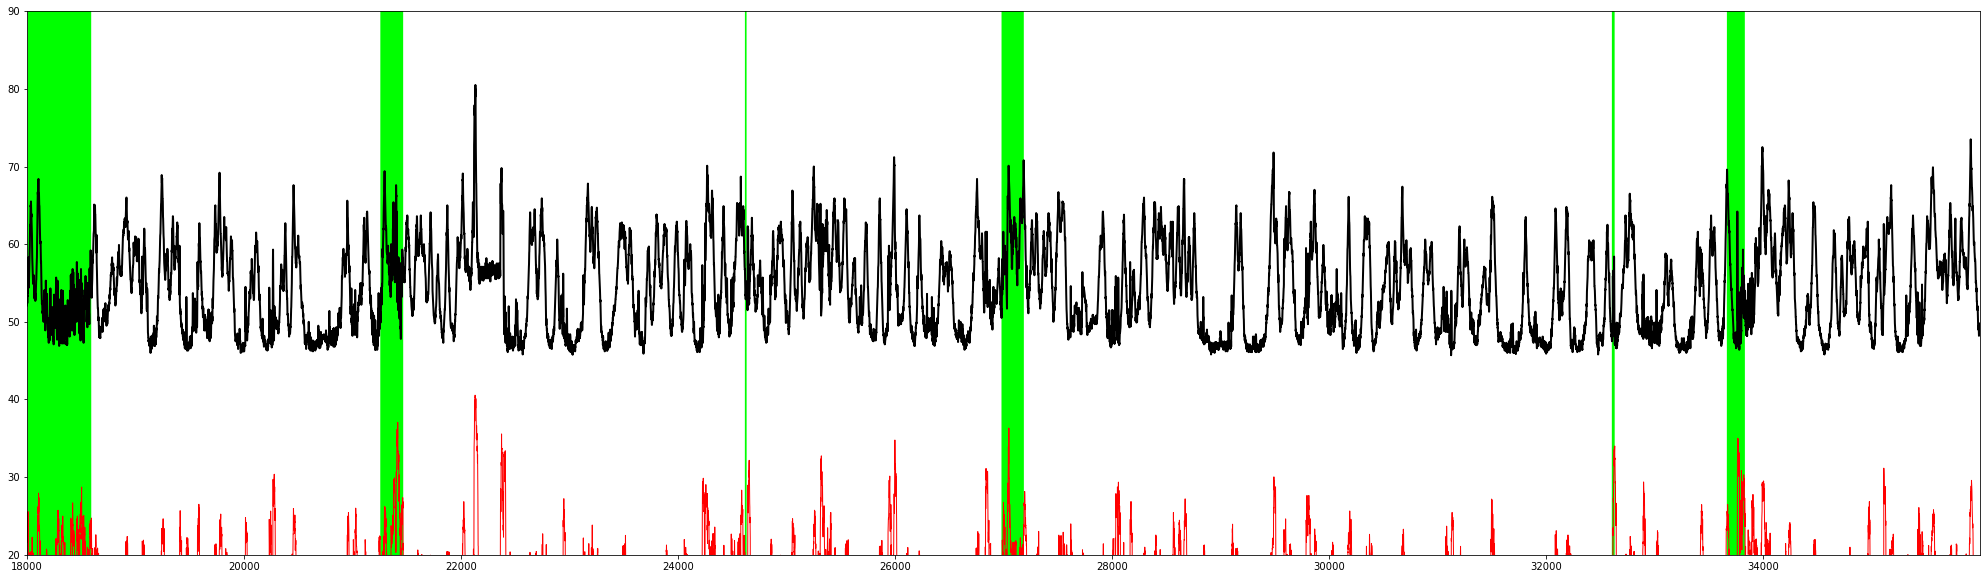

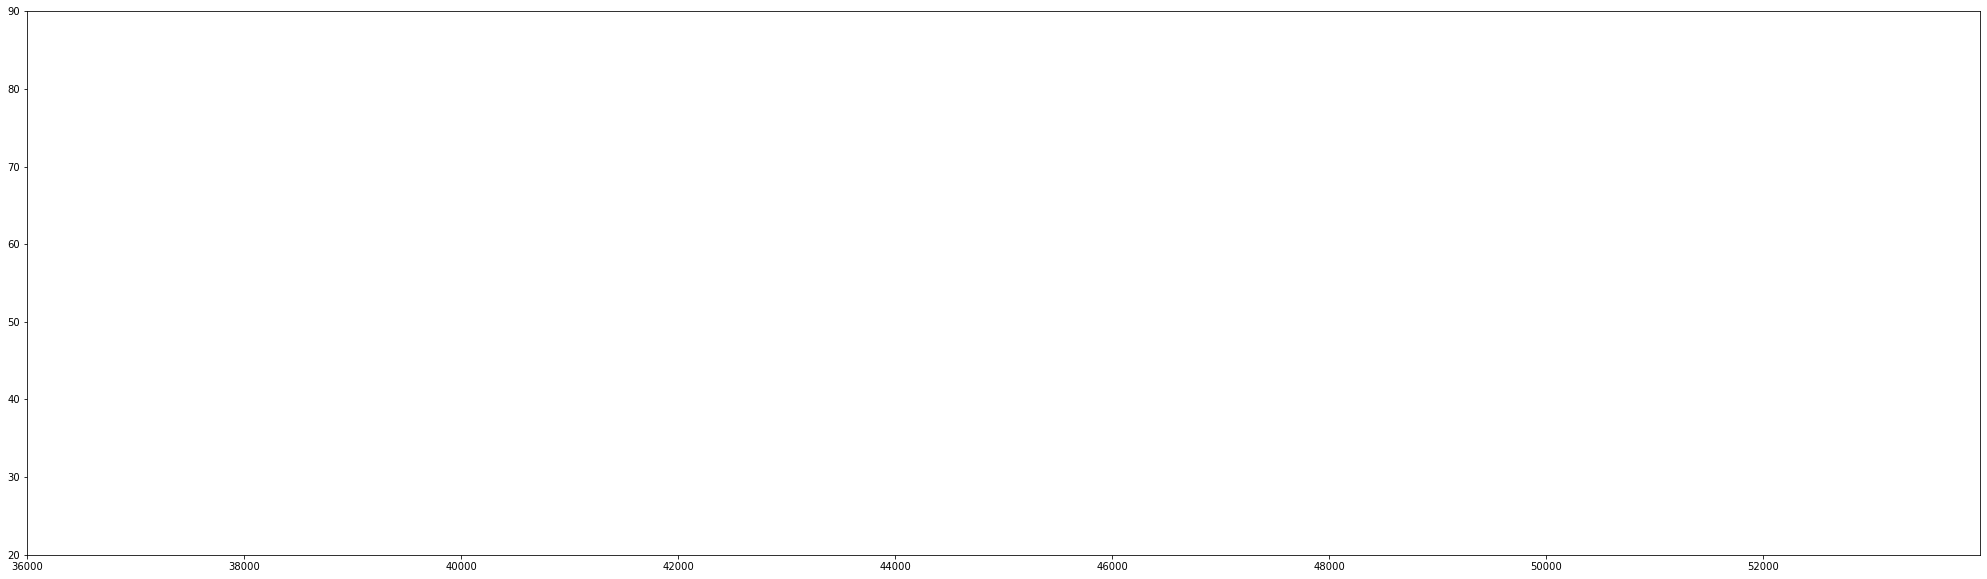

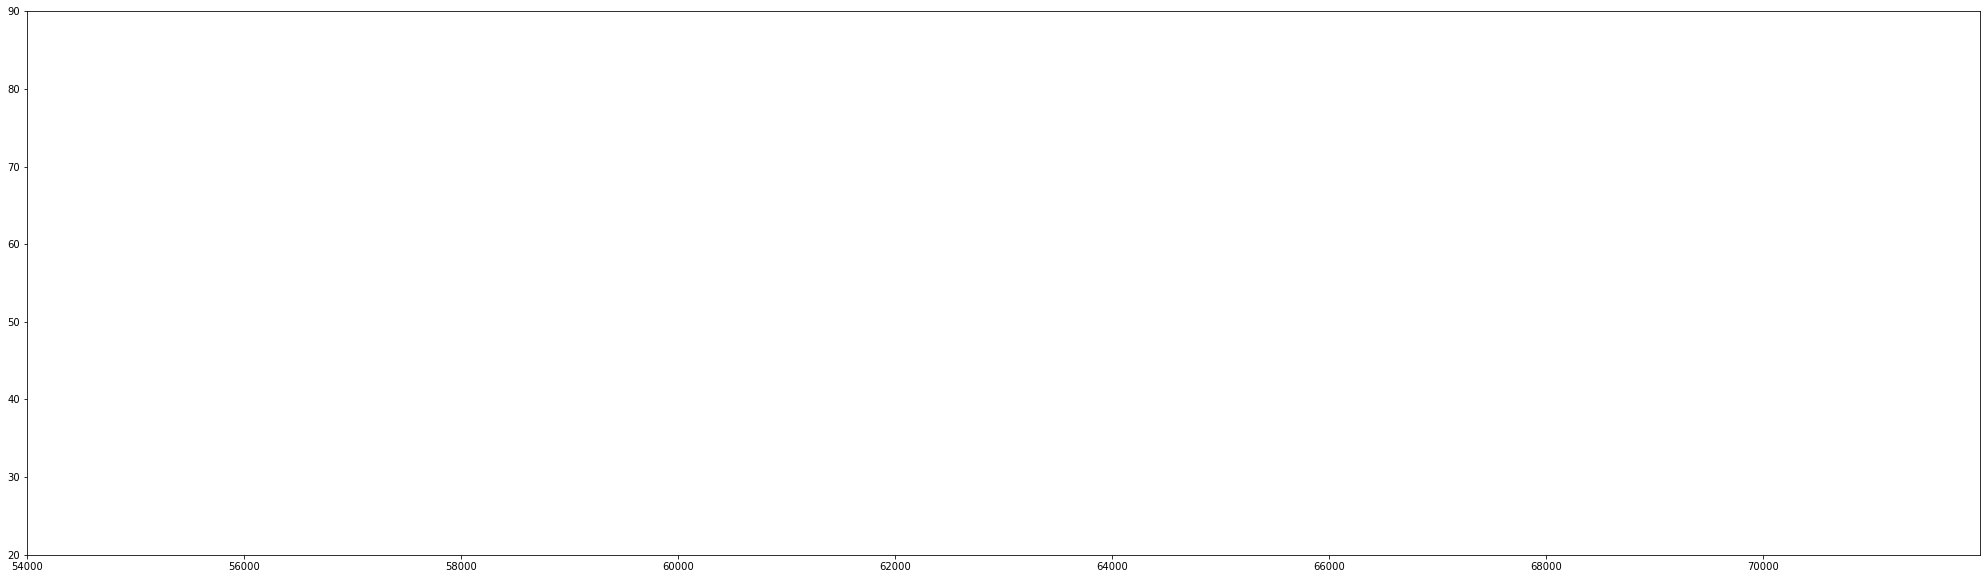

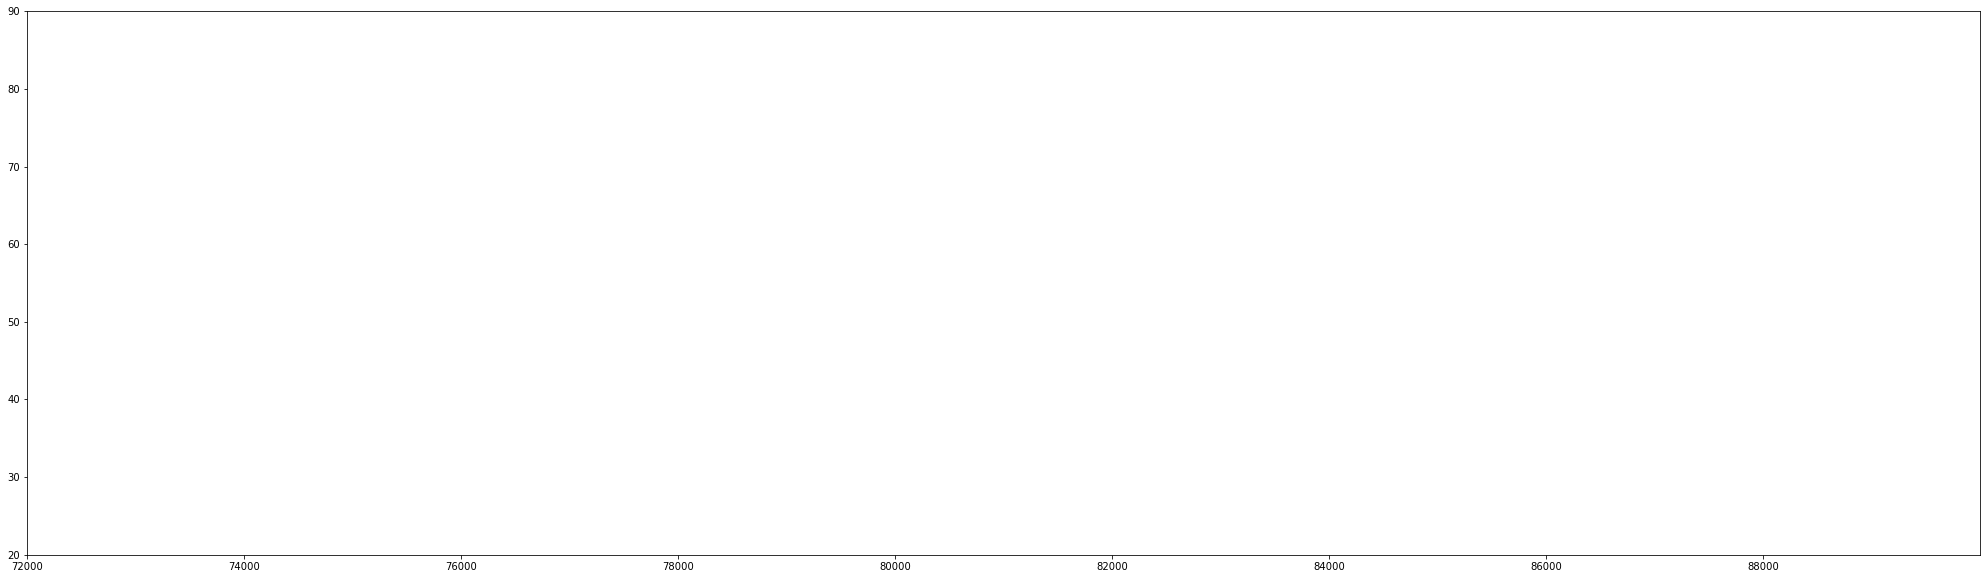

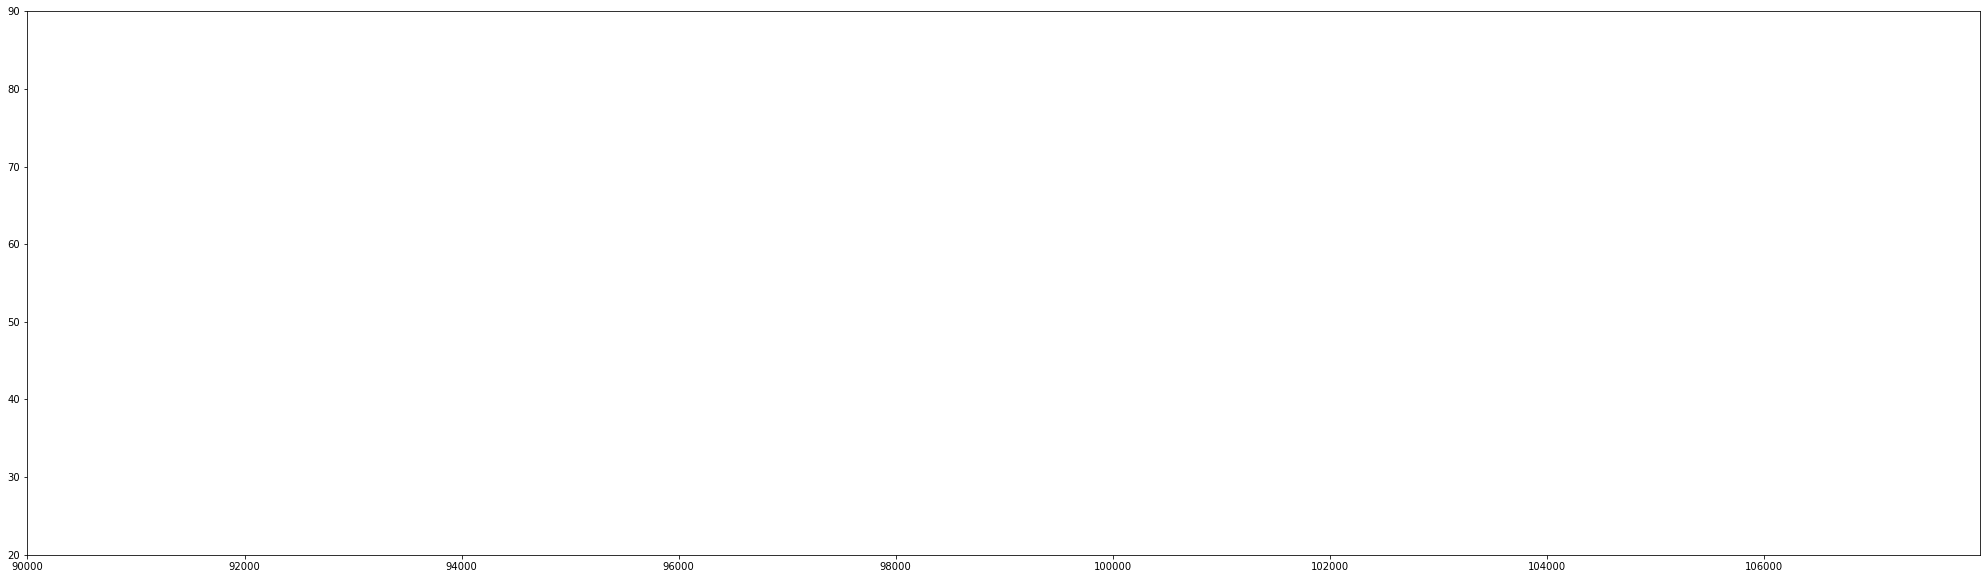

In [9]:
for i in range(6):
    fig = plt.figure(figsize=(35,10))
    ax1 = fig.add_subplot(111)
    ax1.plot(score*-100-30, '-r',linewidth = 1 )
    ax1.plot(test_for_plot, '-k',linewidth = 2)
    ax1.fill_between(label_index, label, facecolor='lime' )
    plt.xlim(i*17999,17999*(i+1))
    plt.ylim(20, 90)
    plt.show()

C:\Users\Arakawa\AppData\Local\Temp/ipykernel_31796/688793755.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30, 8))


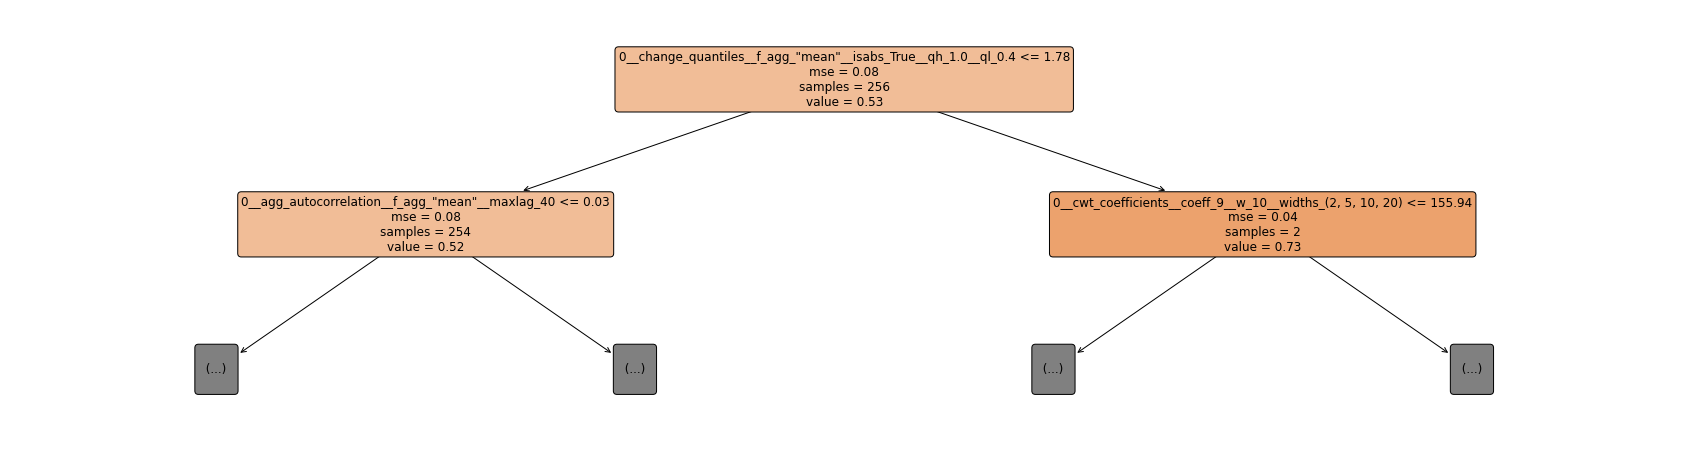

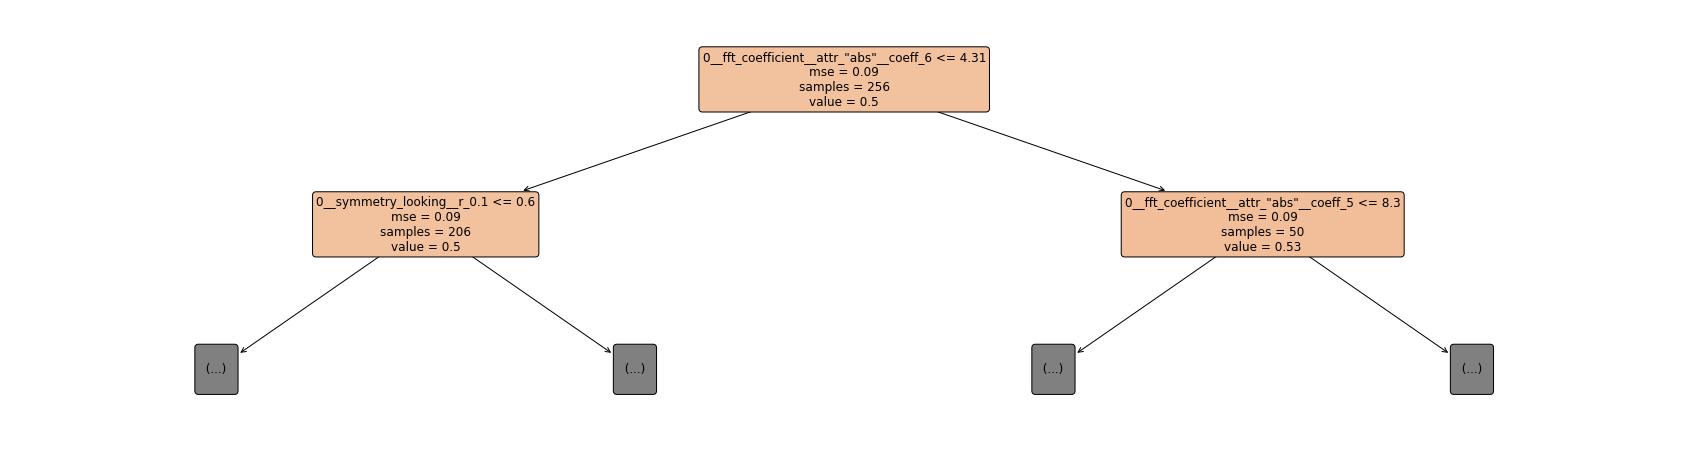

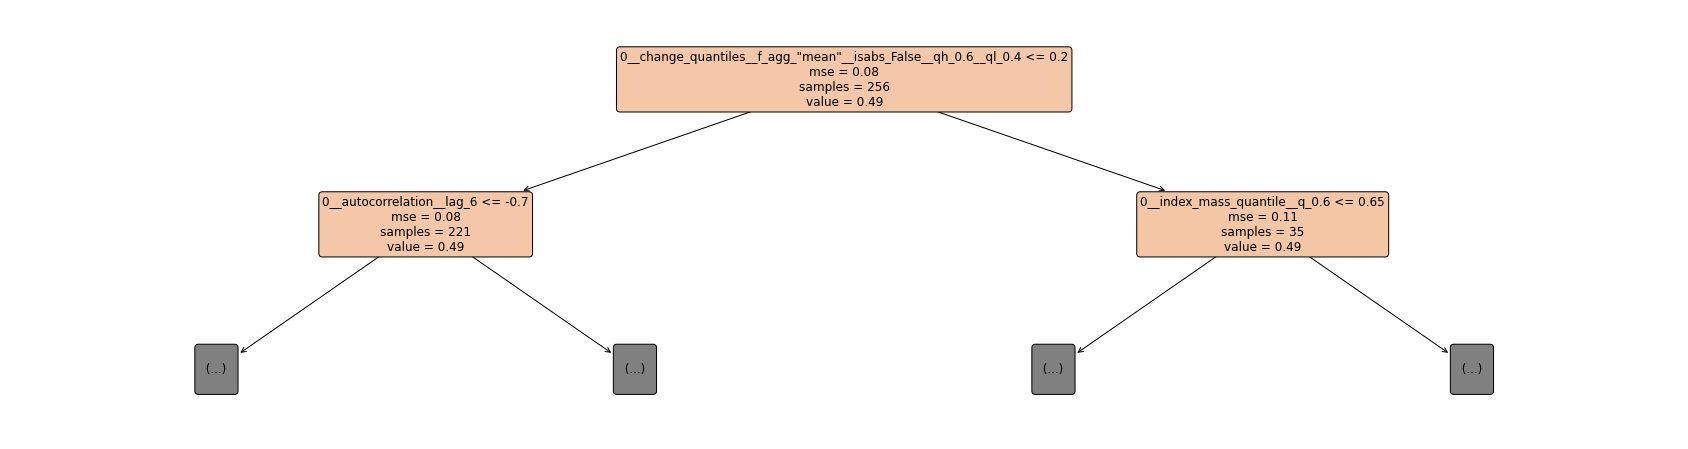

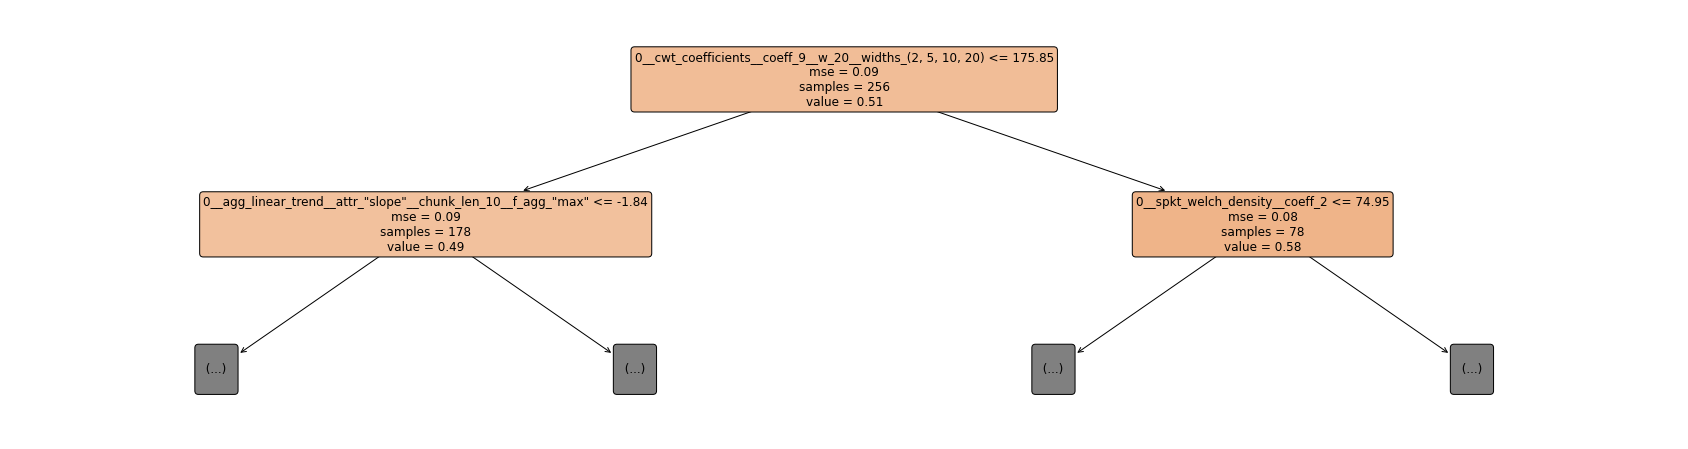

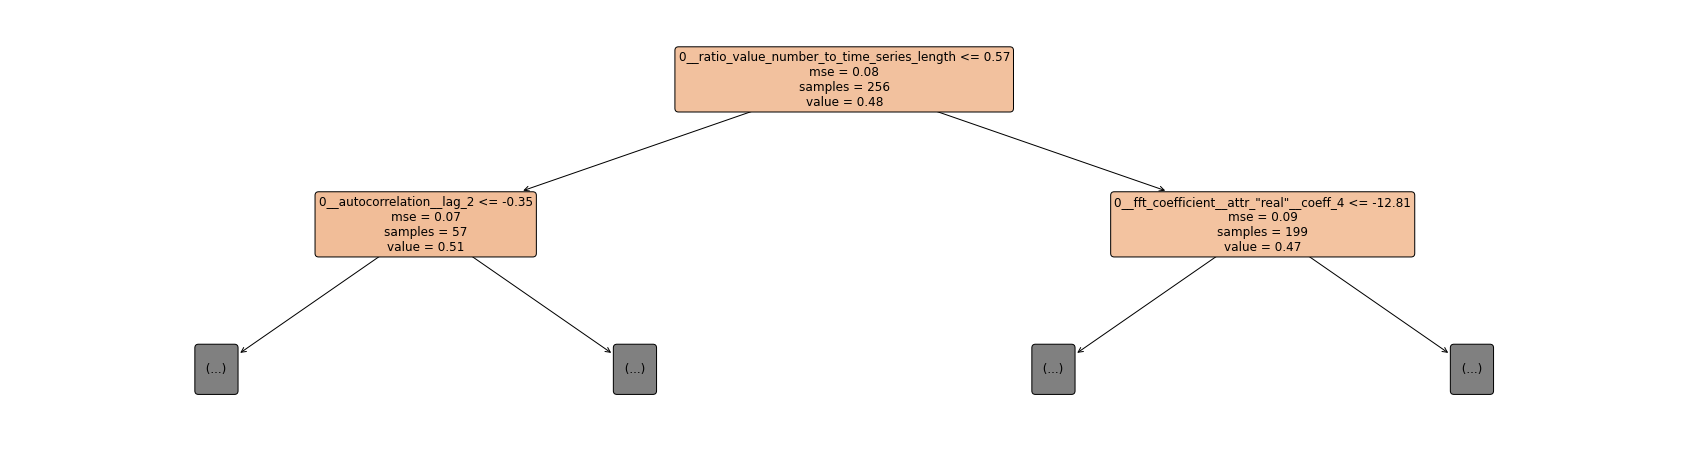

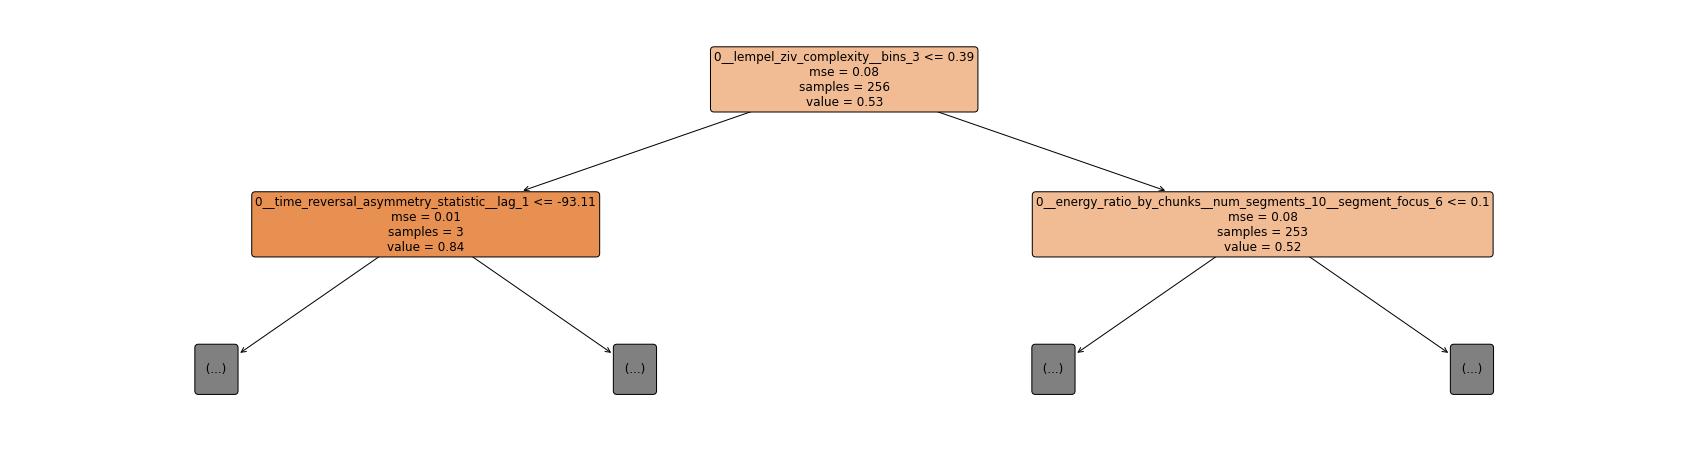

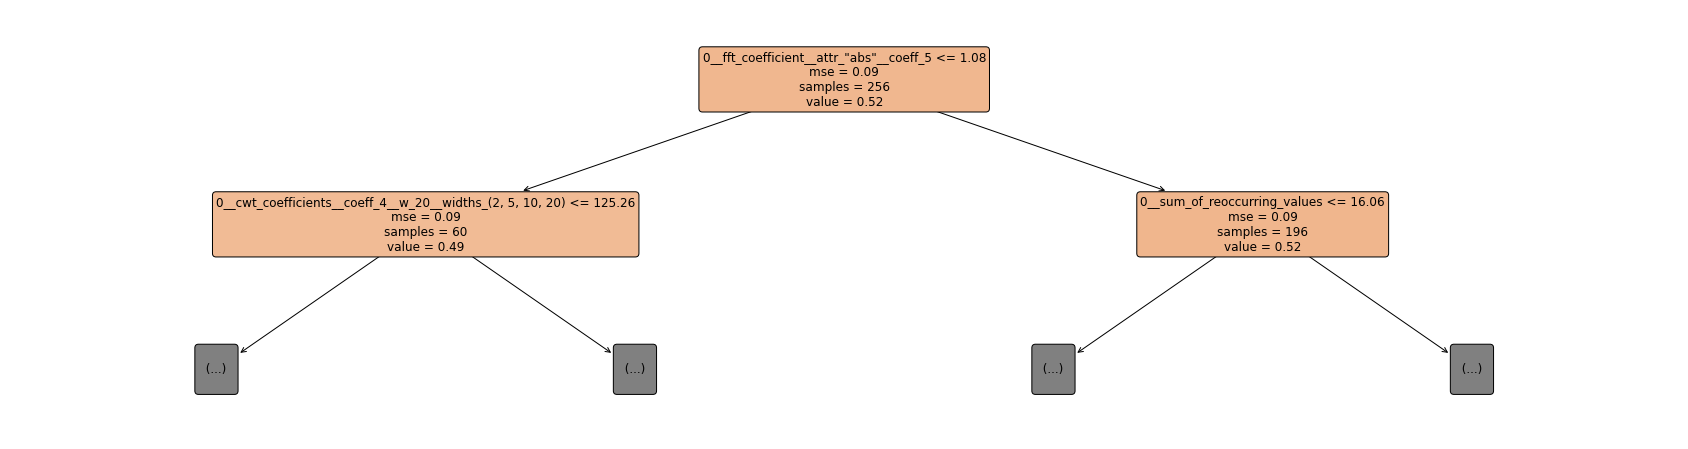

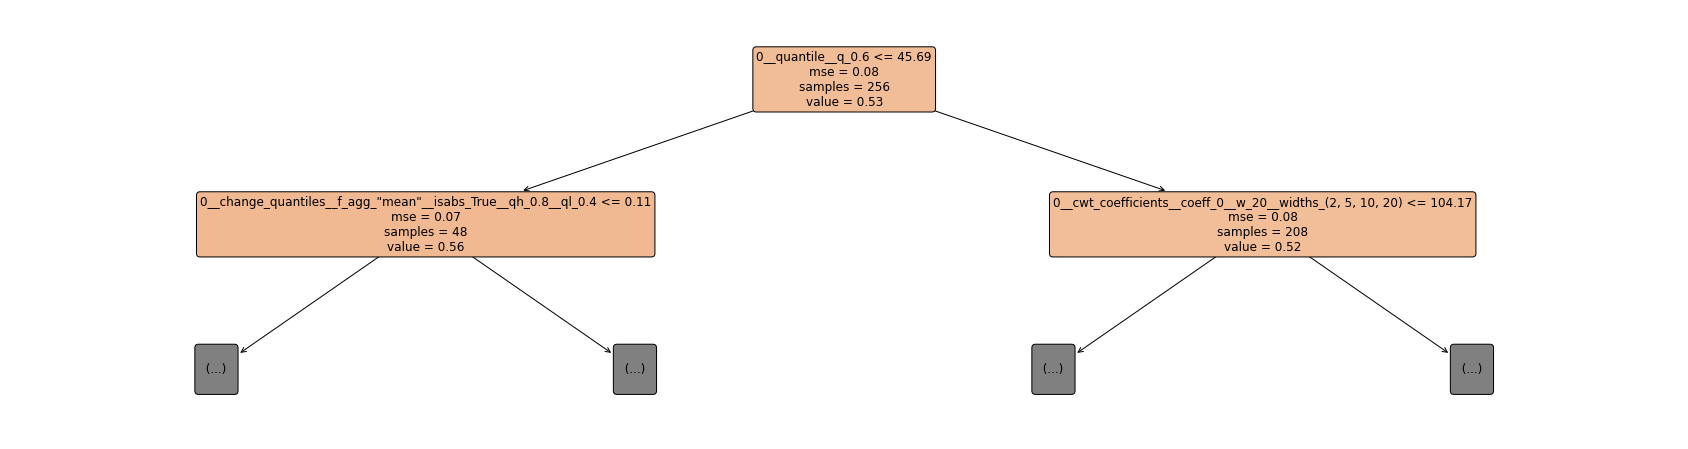

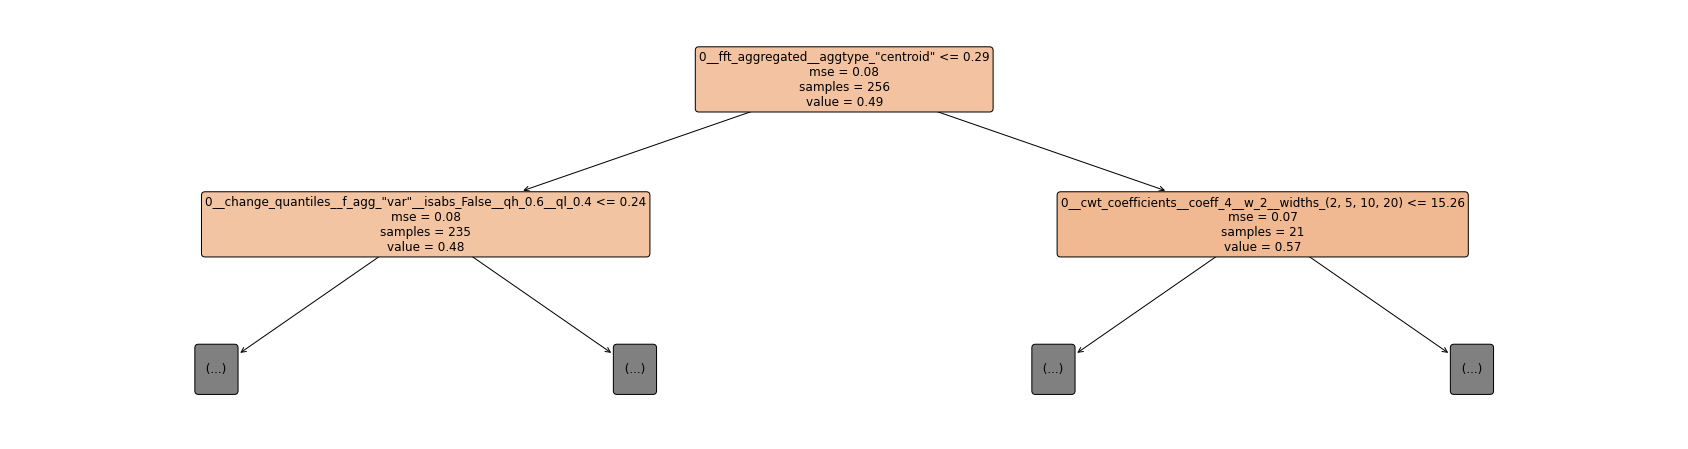

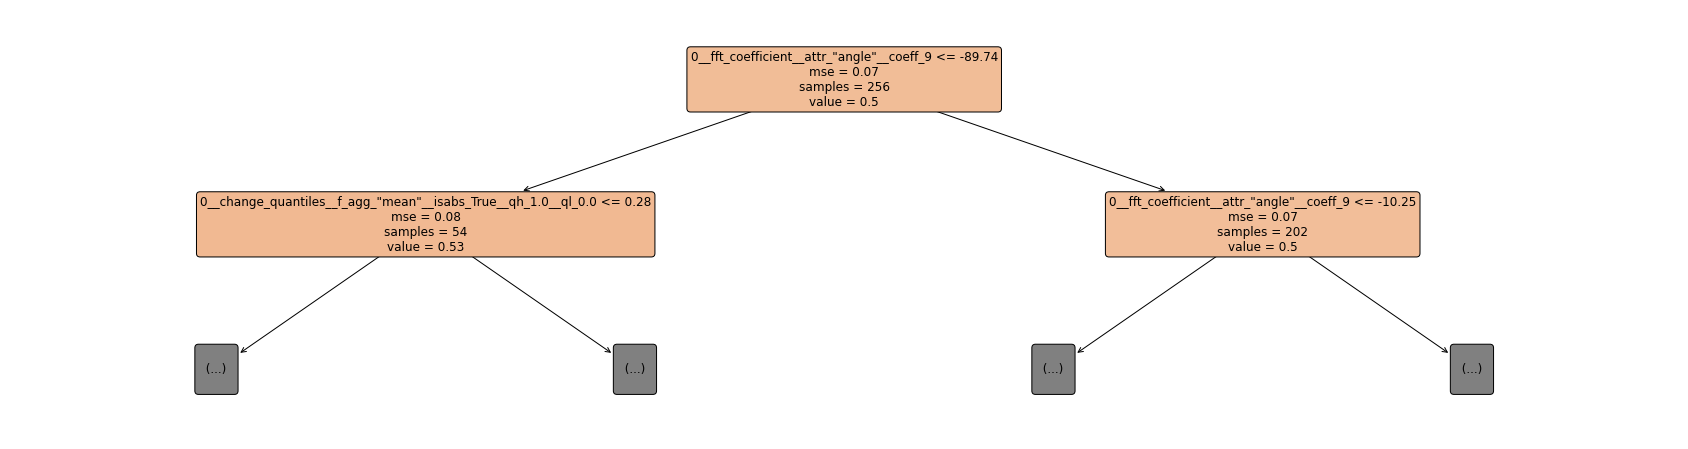

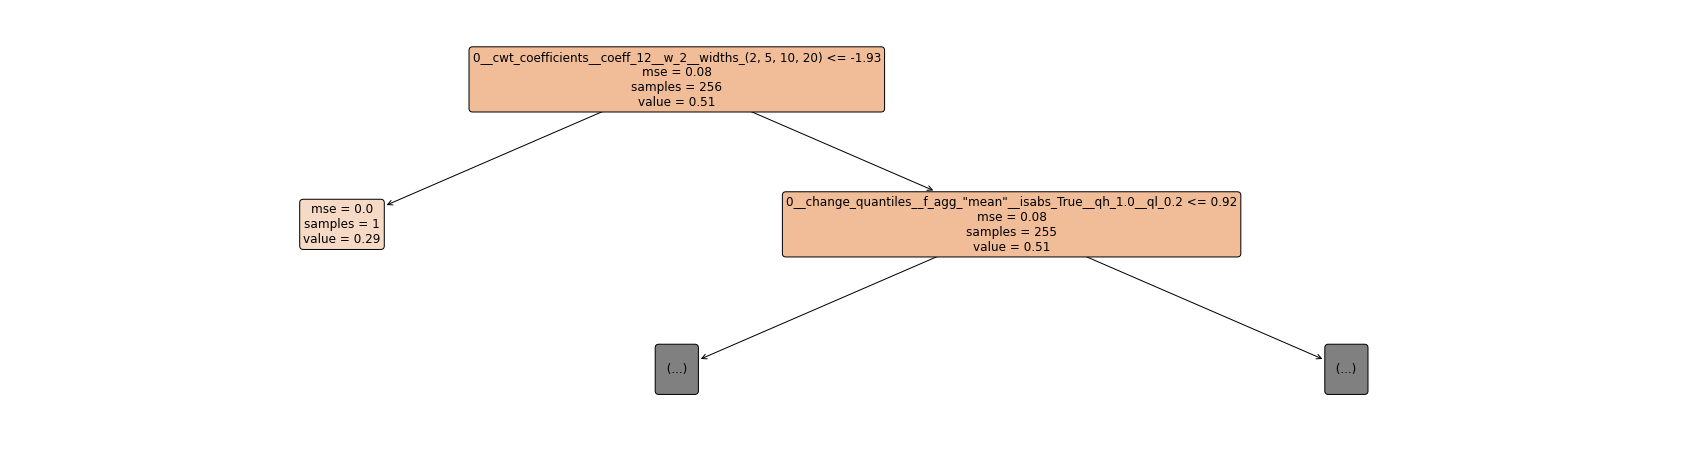

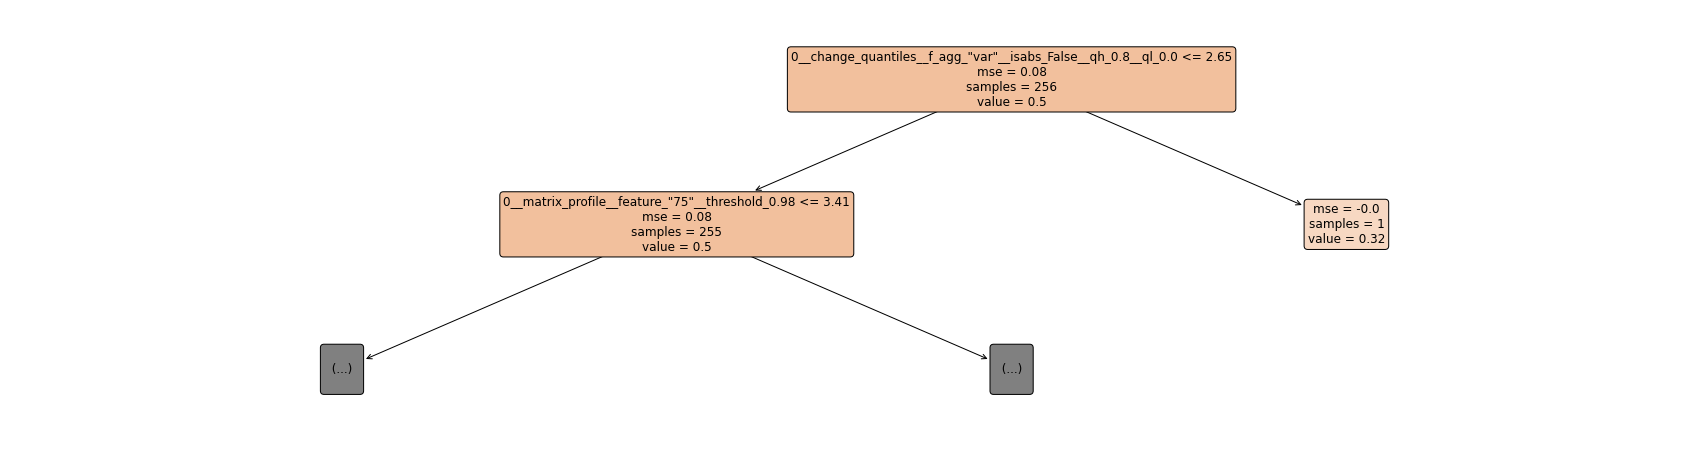

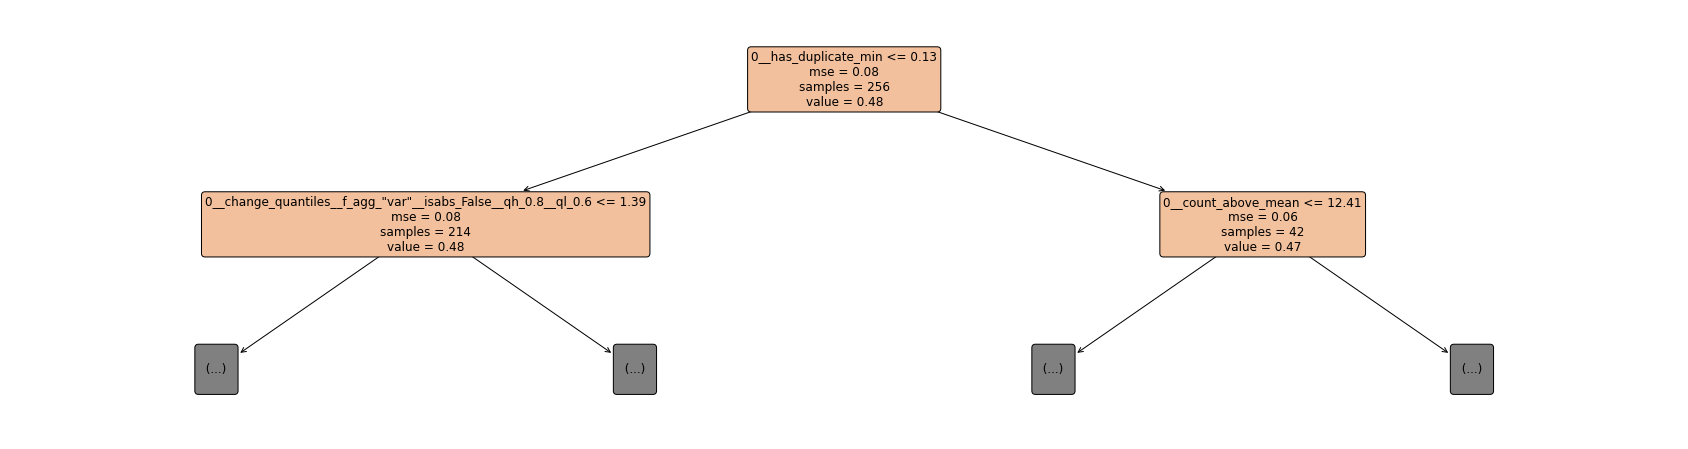

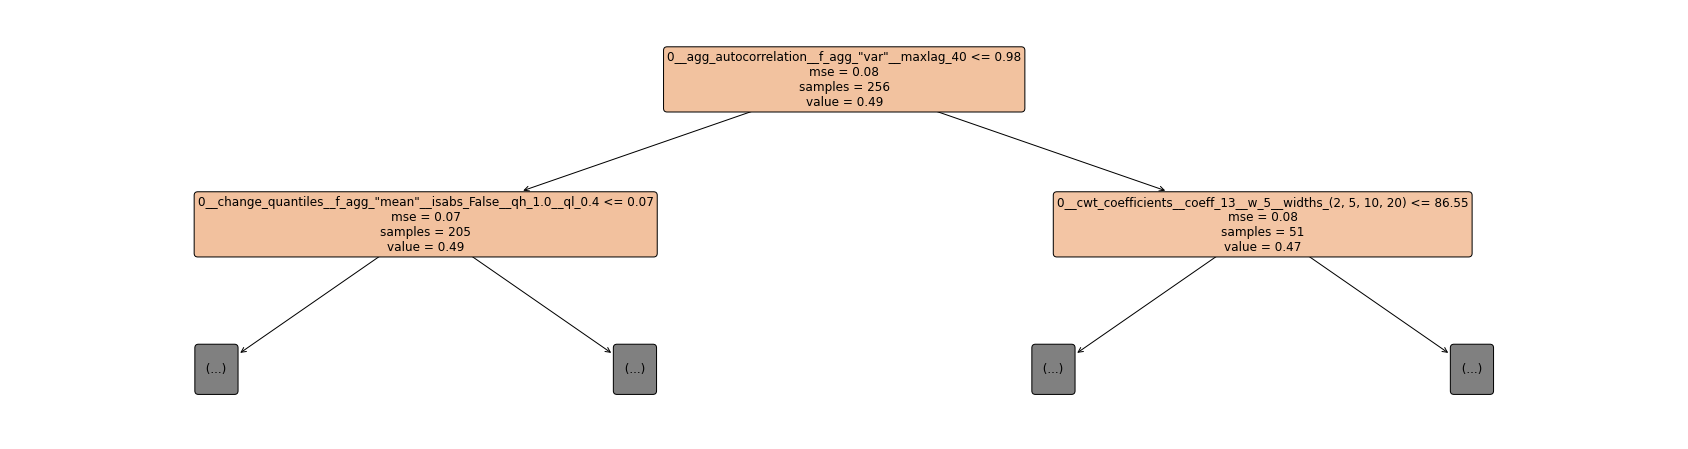

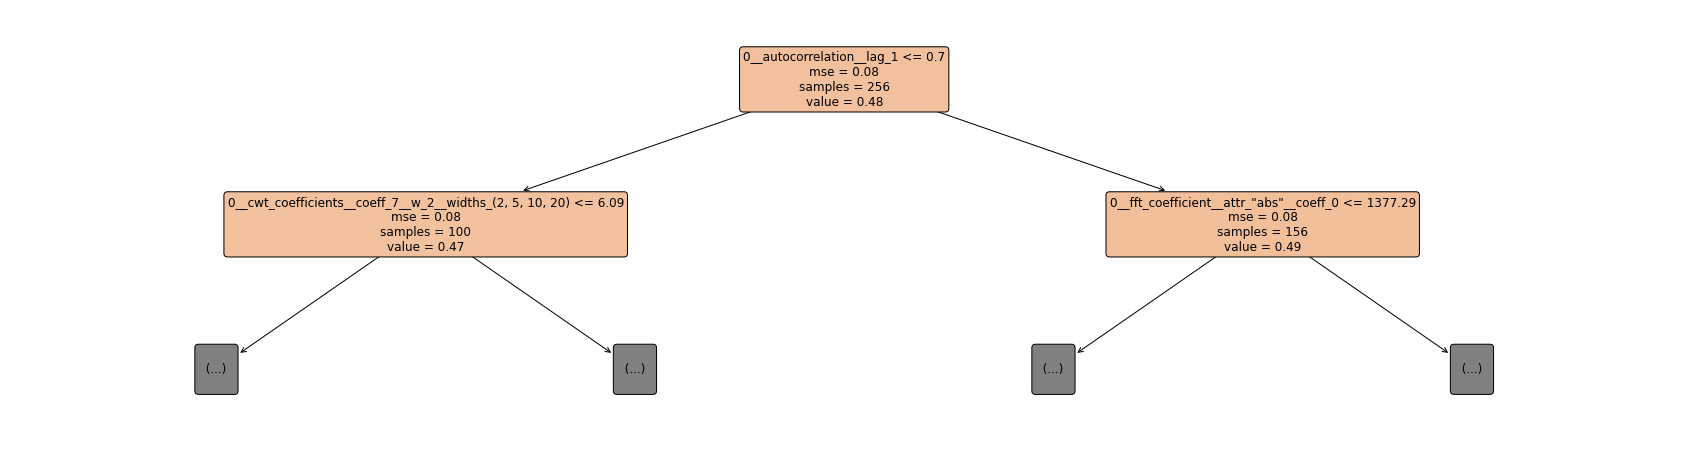

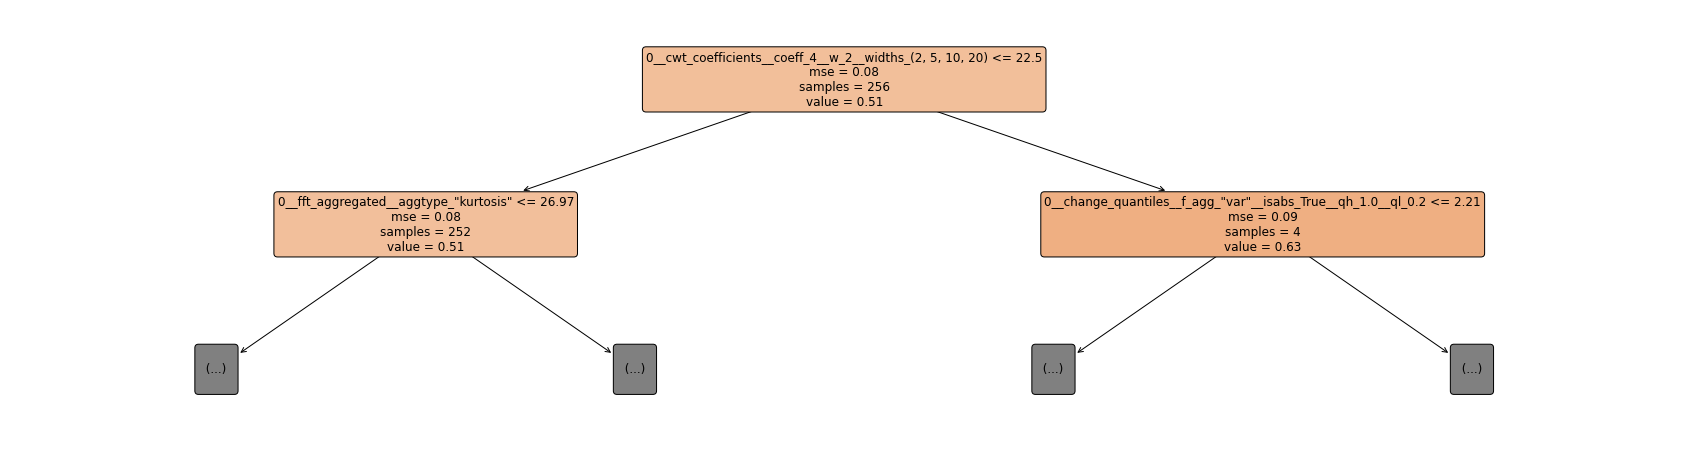

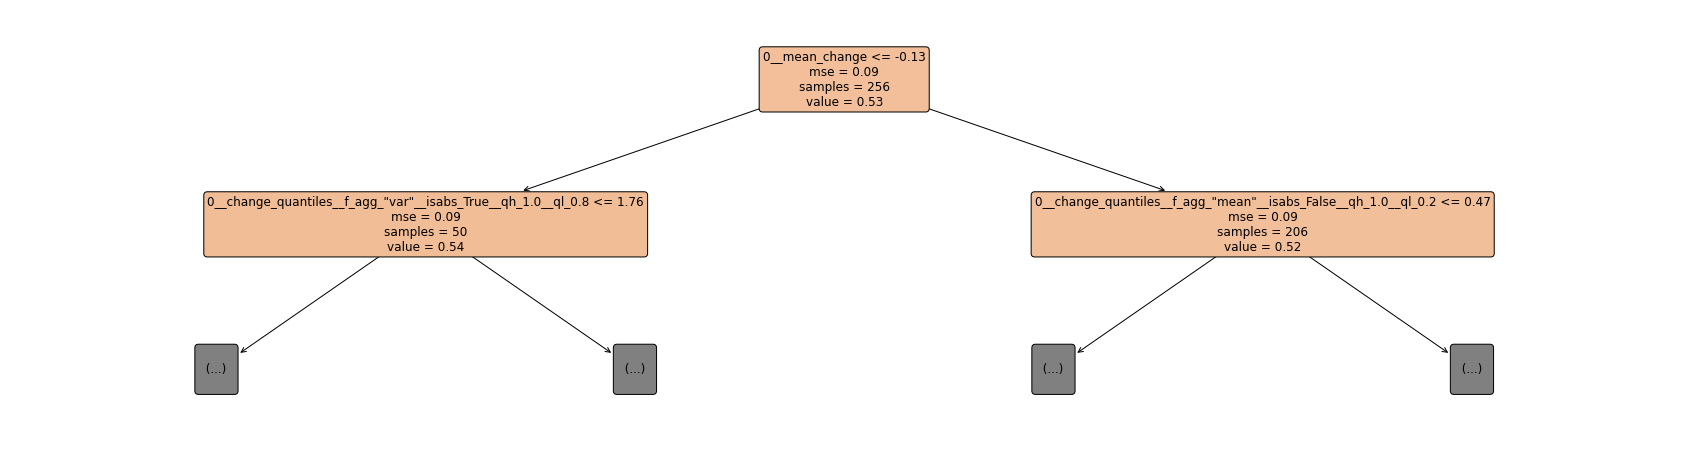

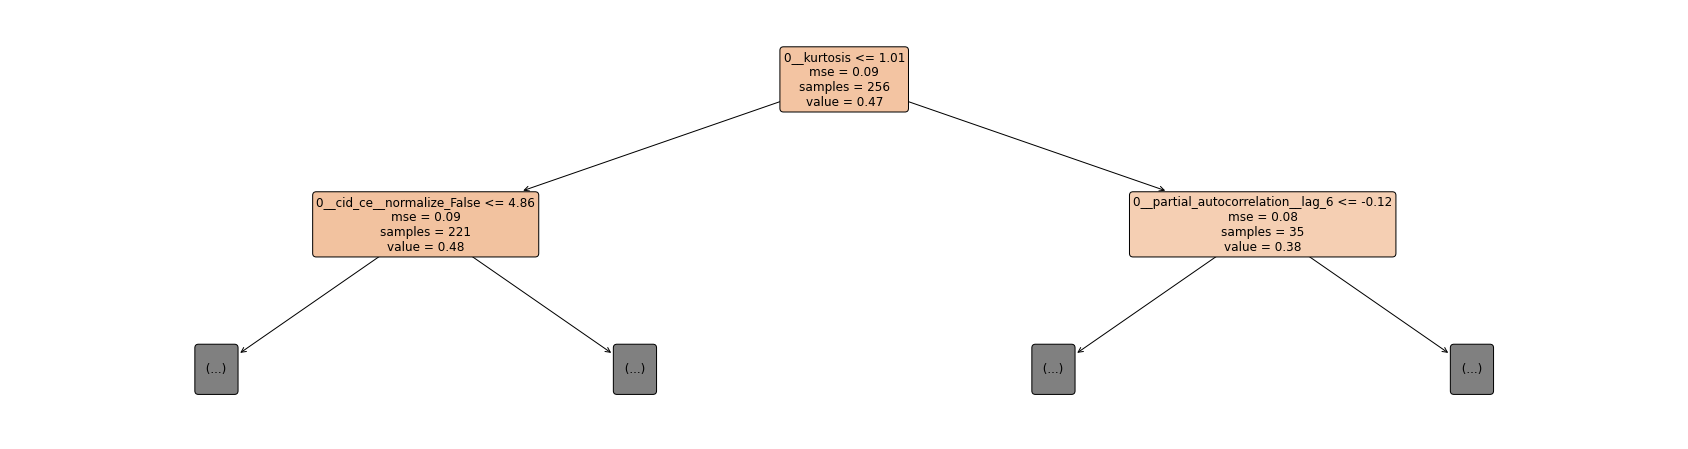

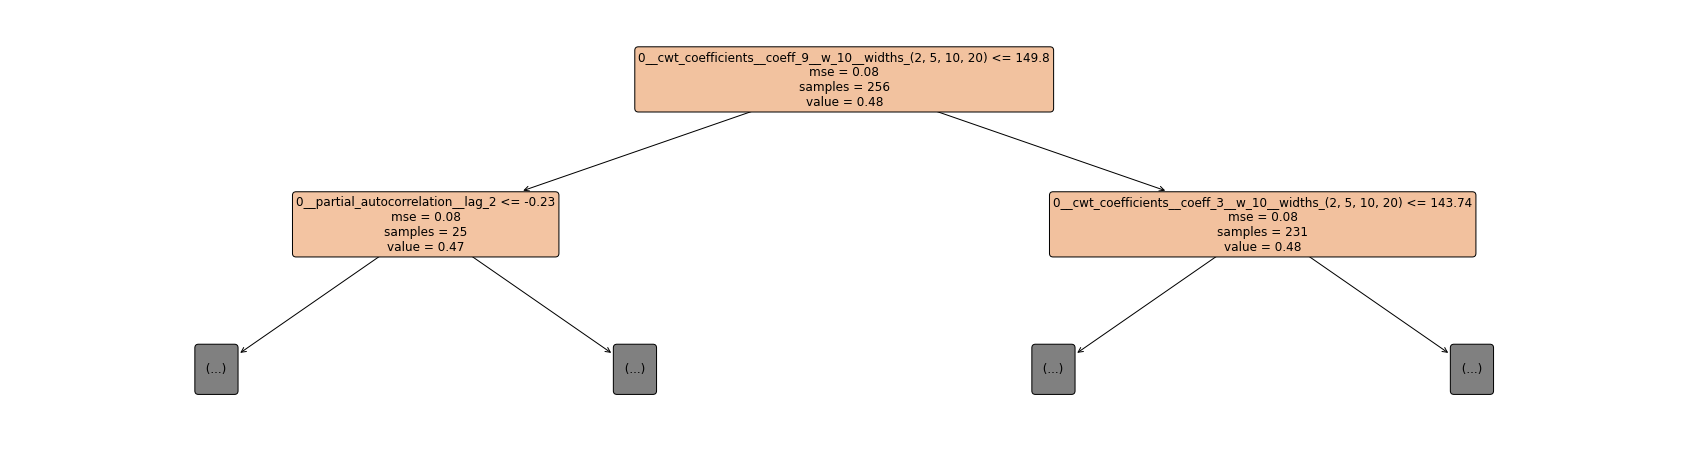

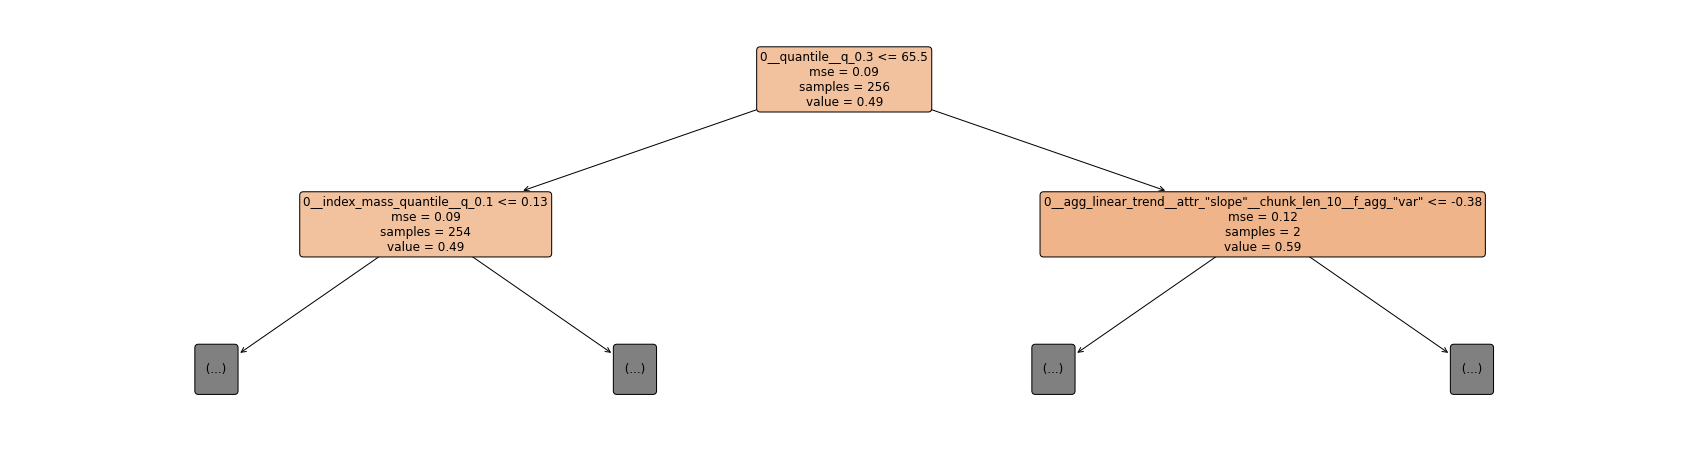

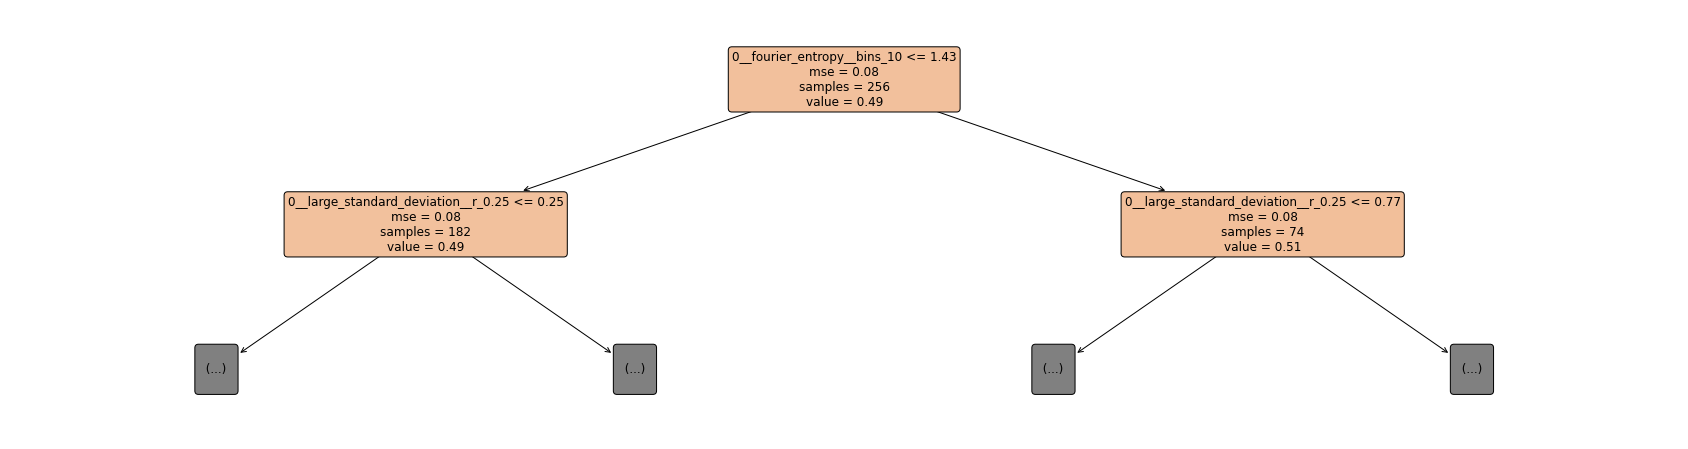

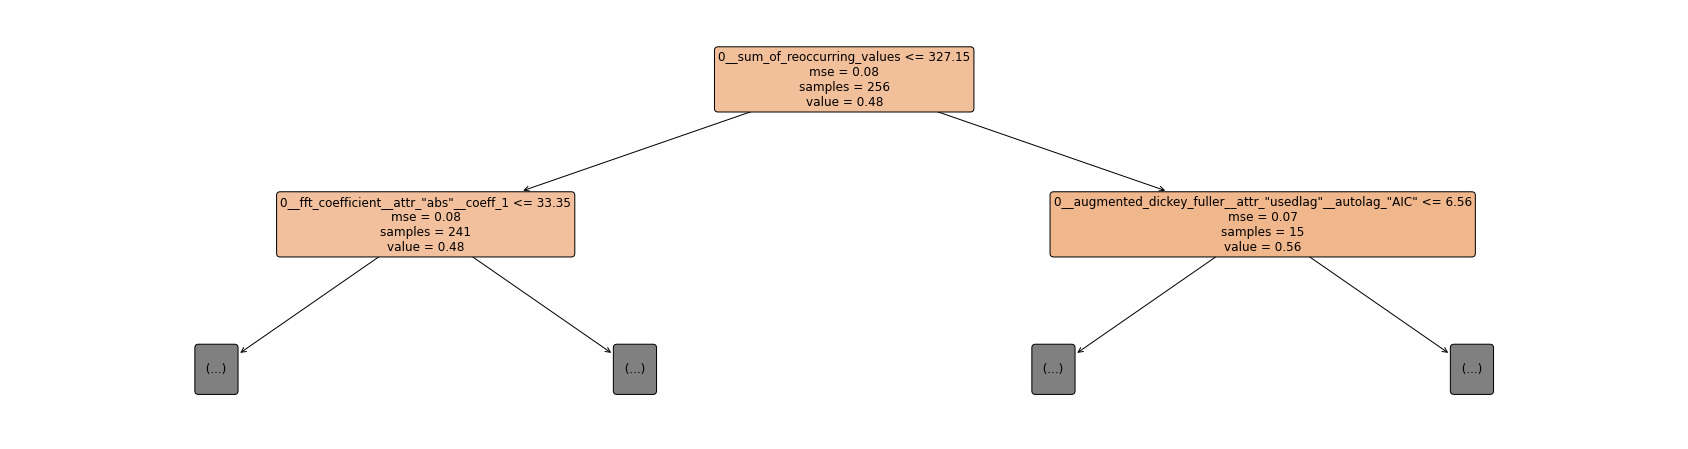

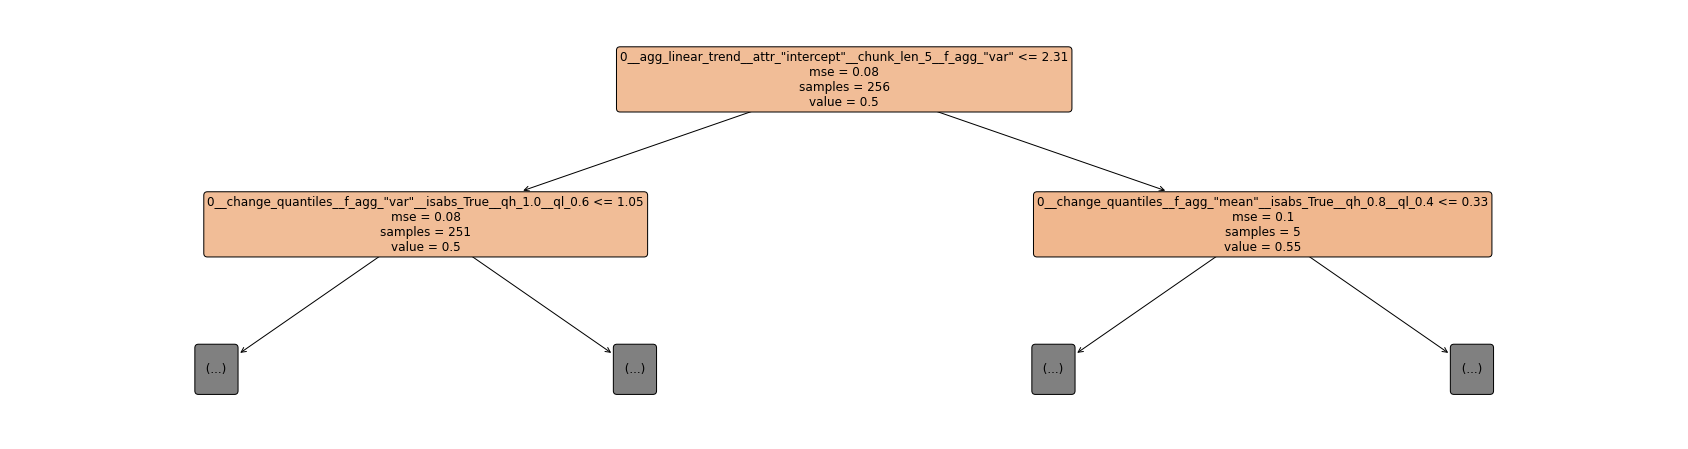

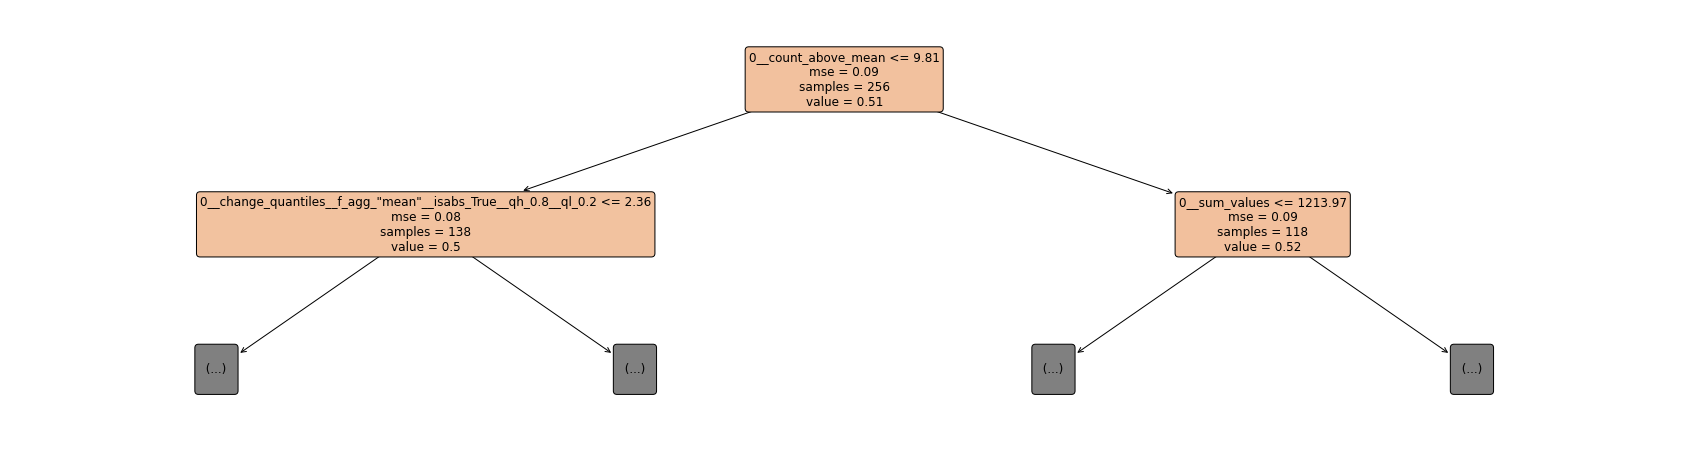

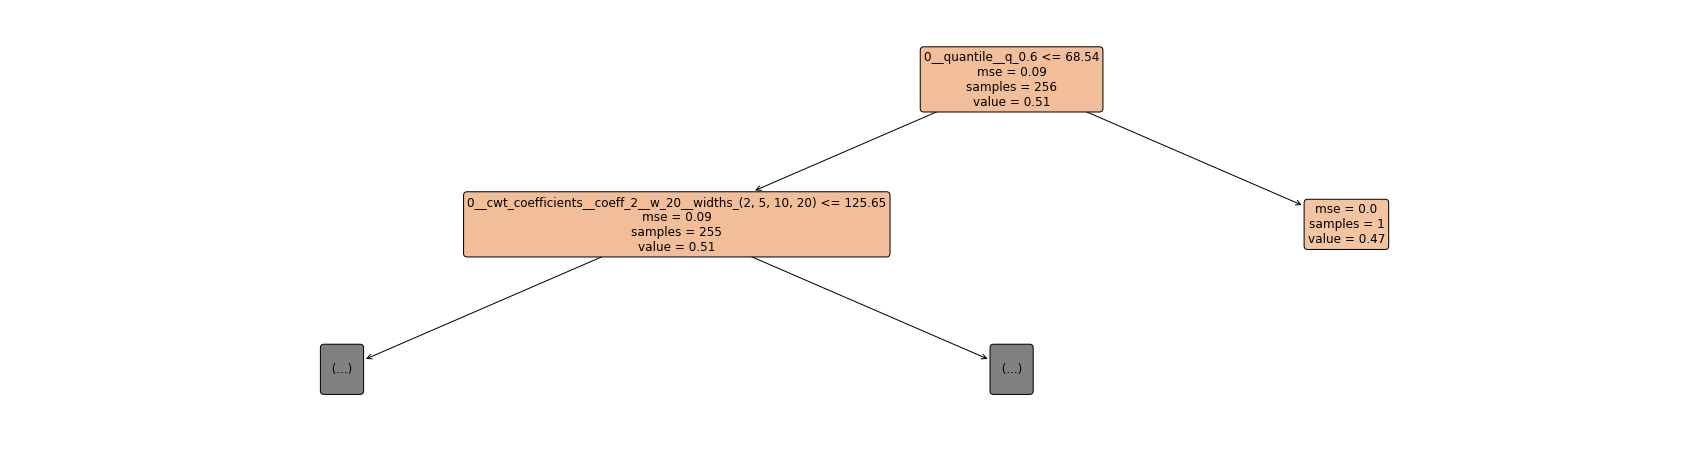

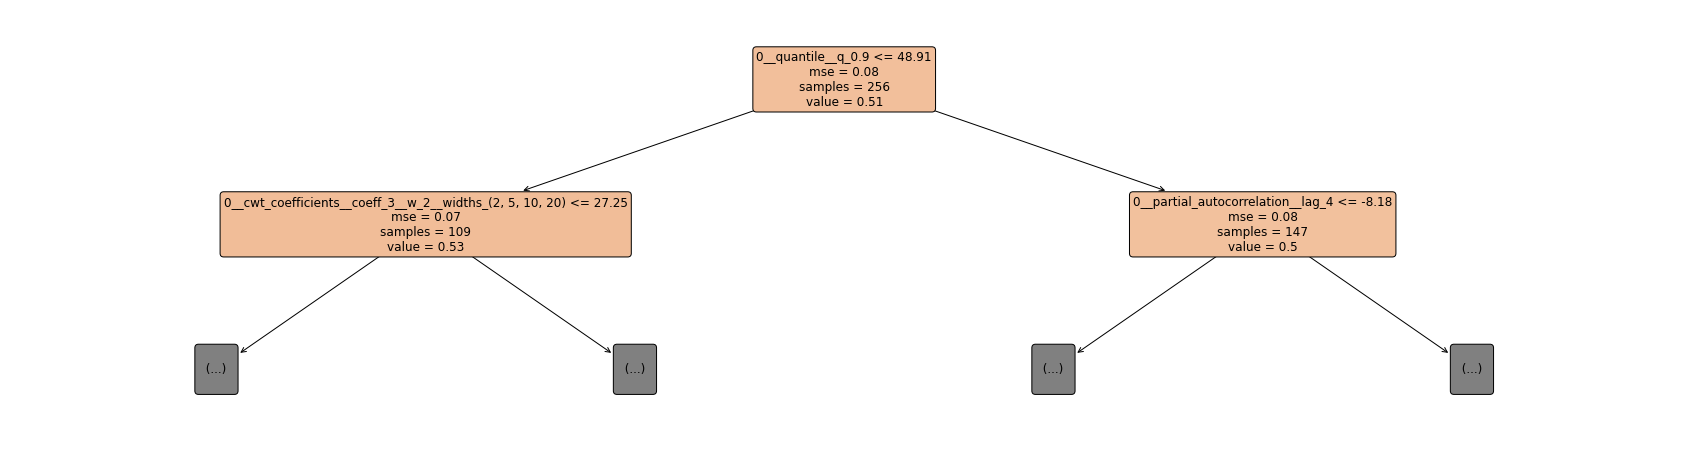

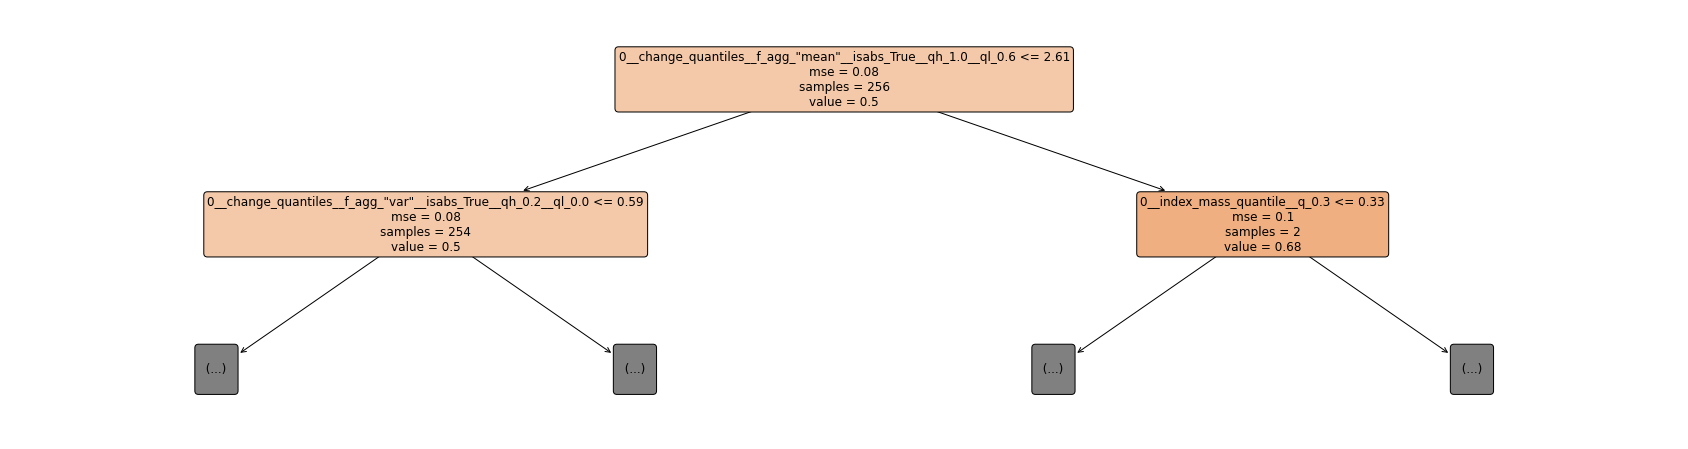

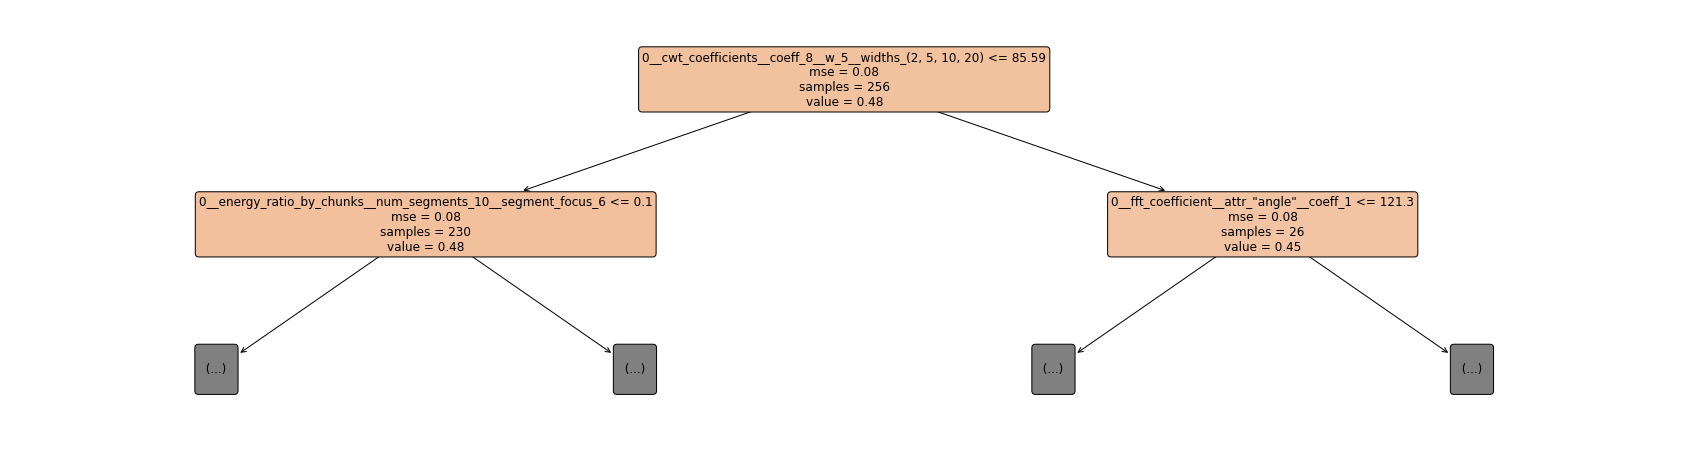

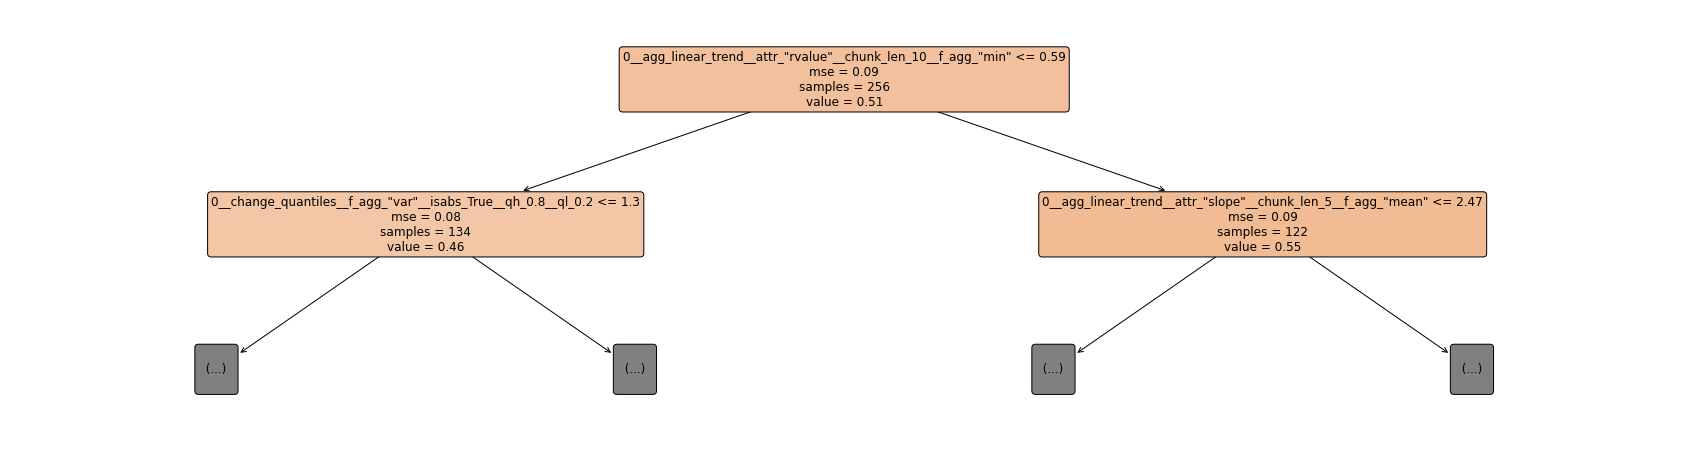

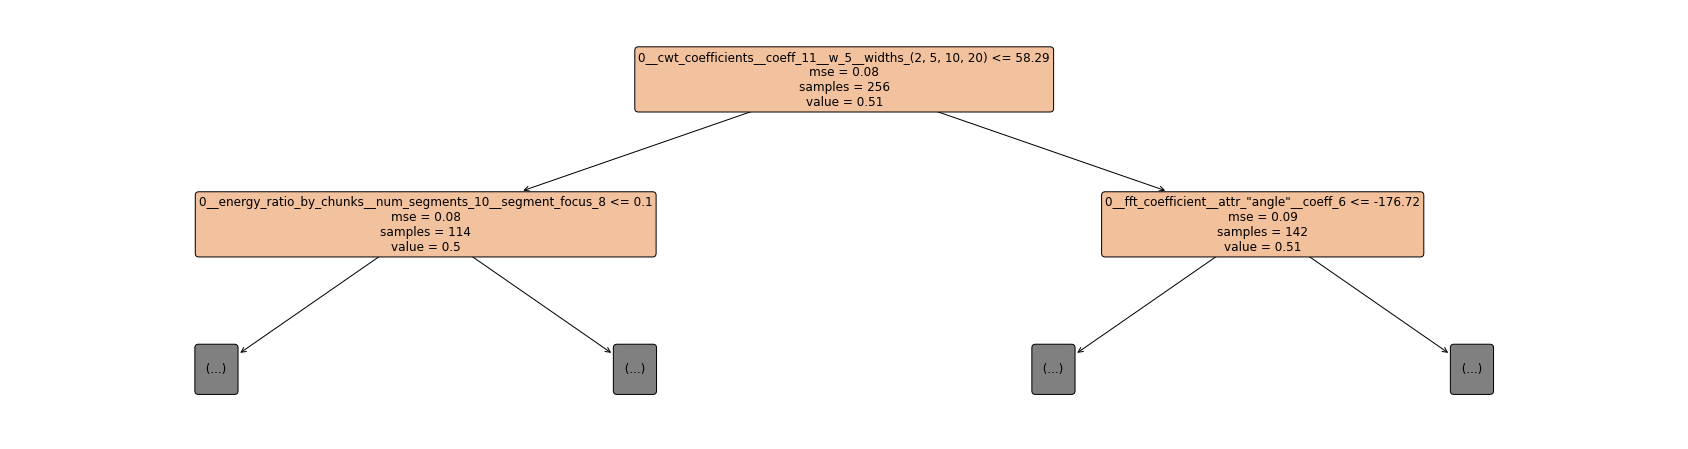

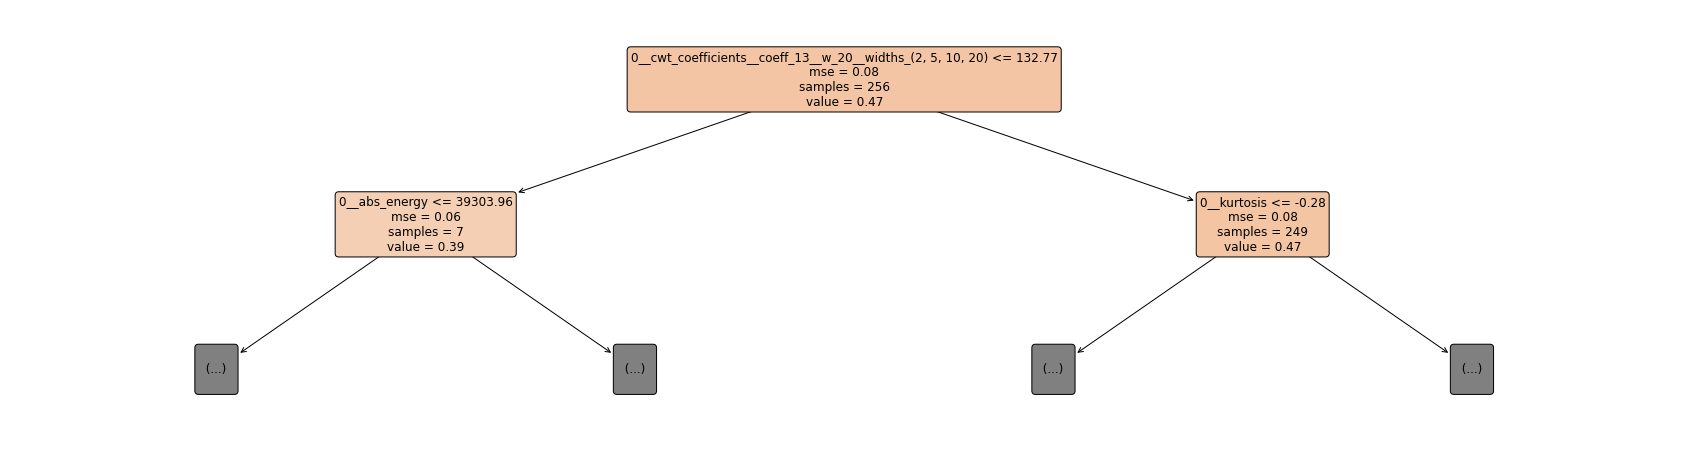

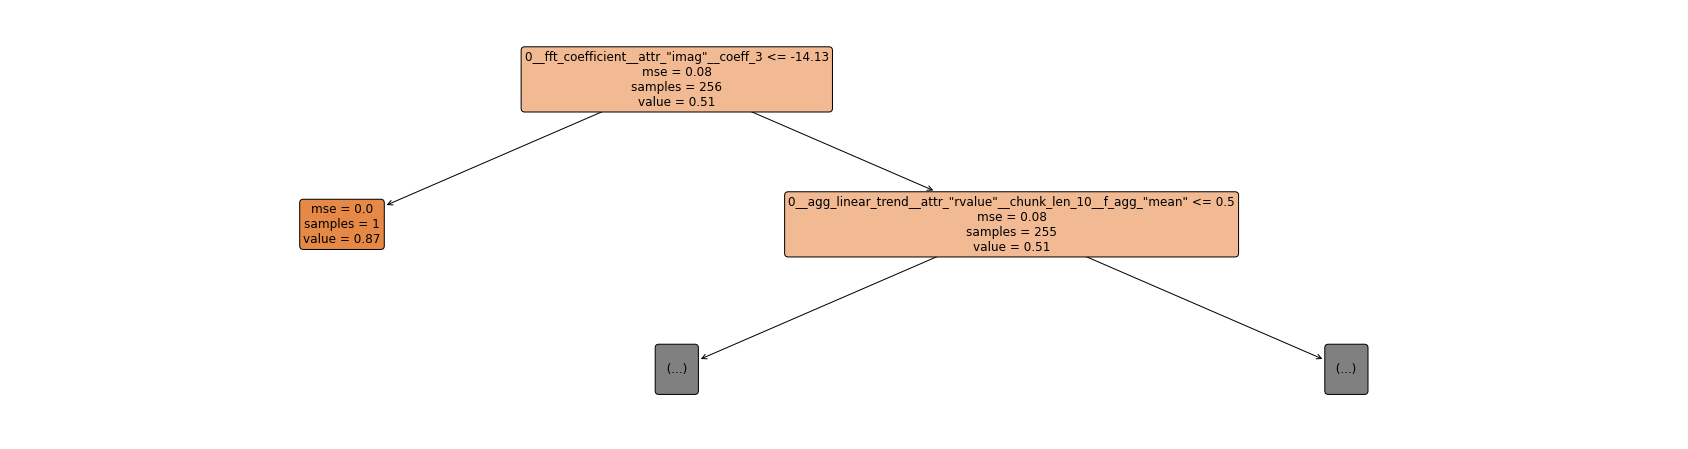

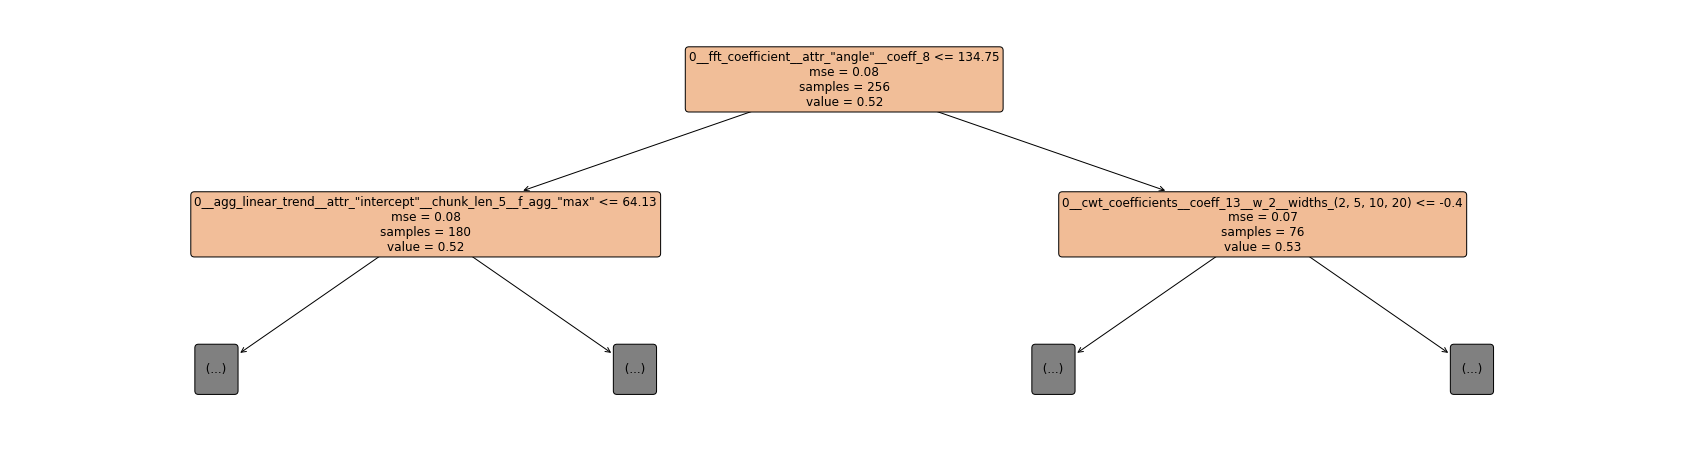

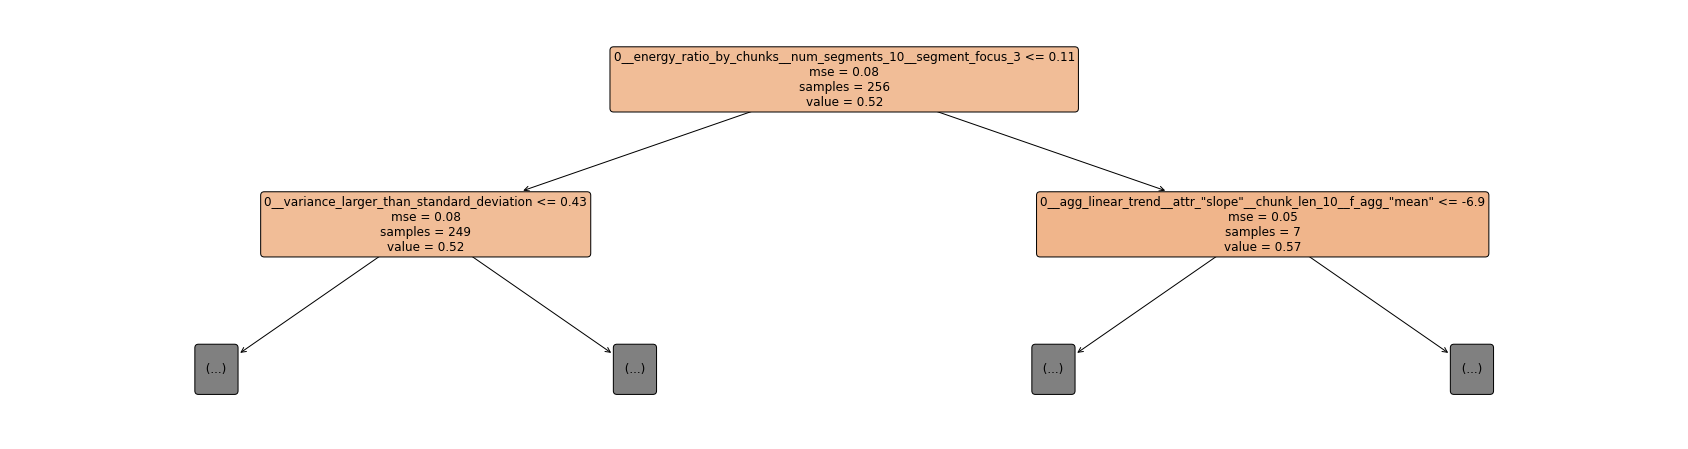

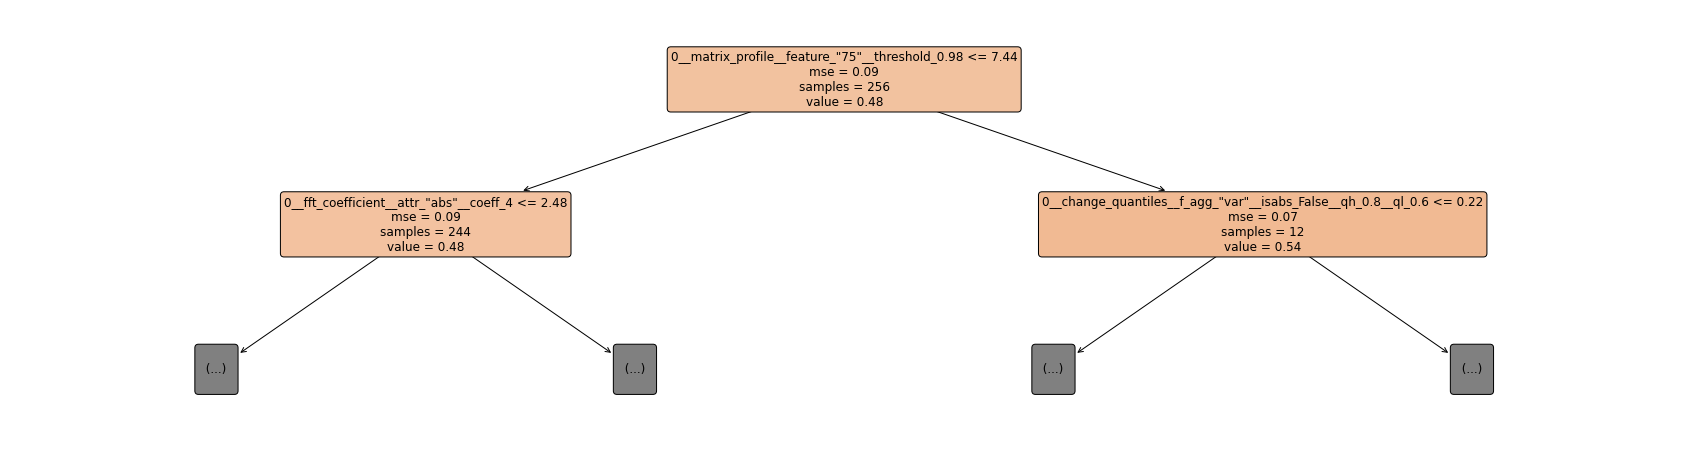

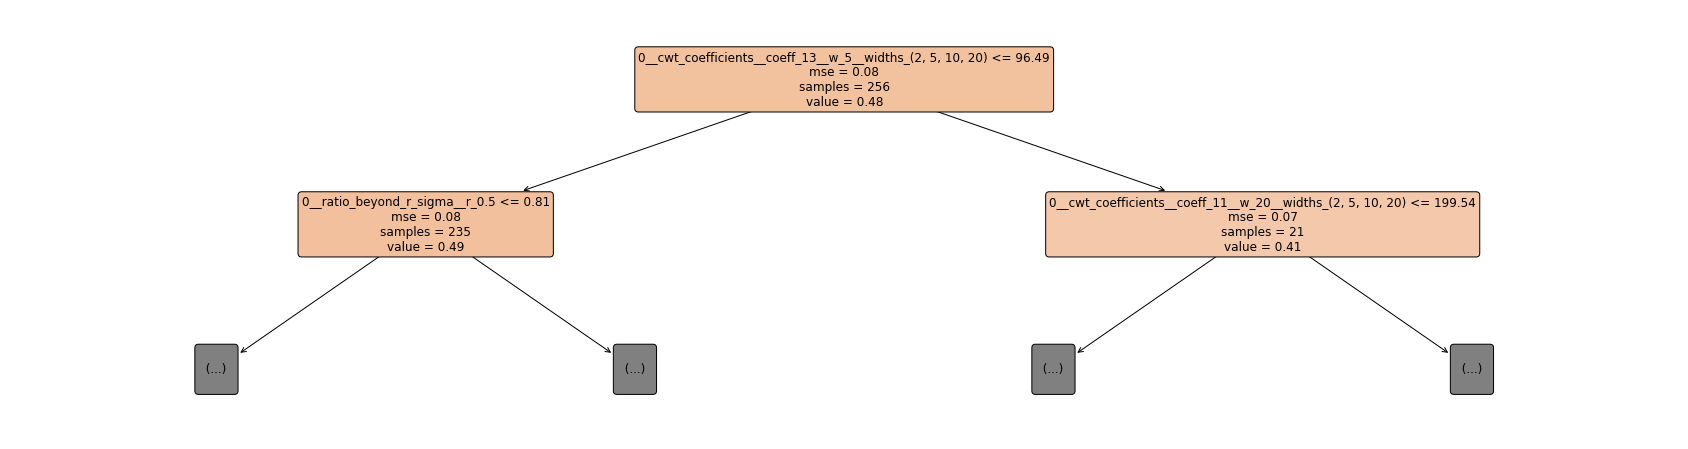

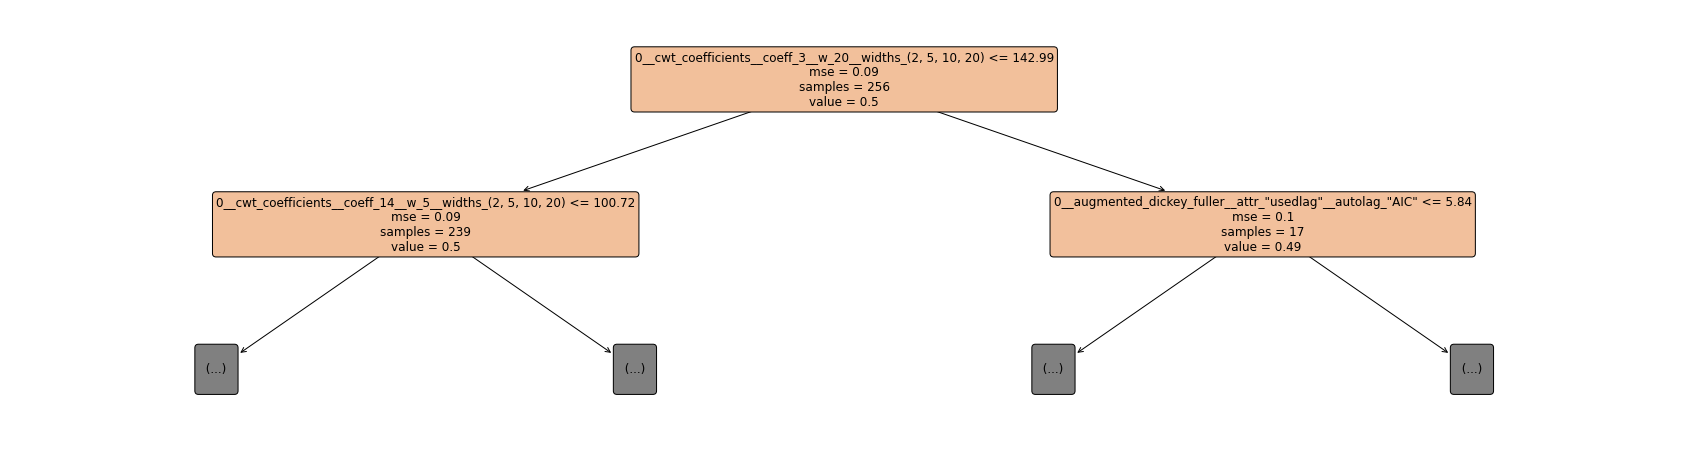

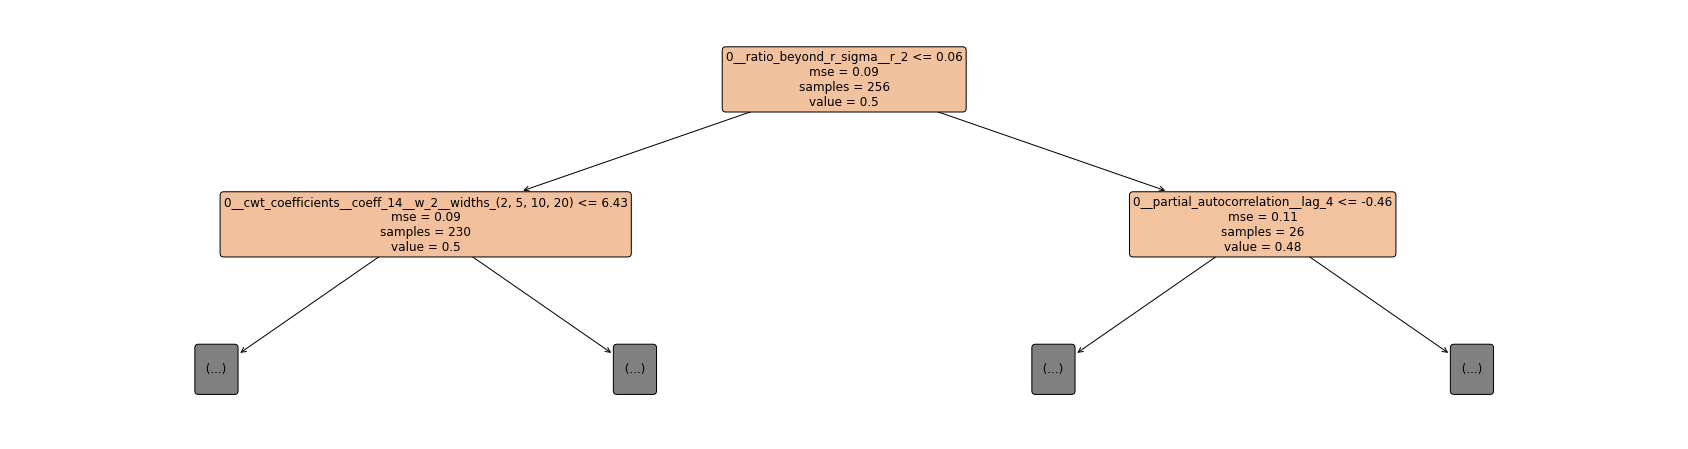

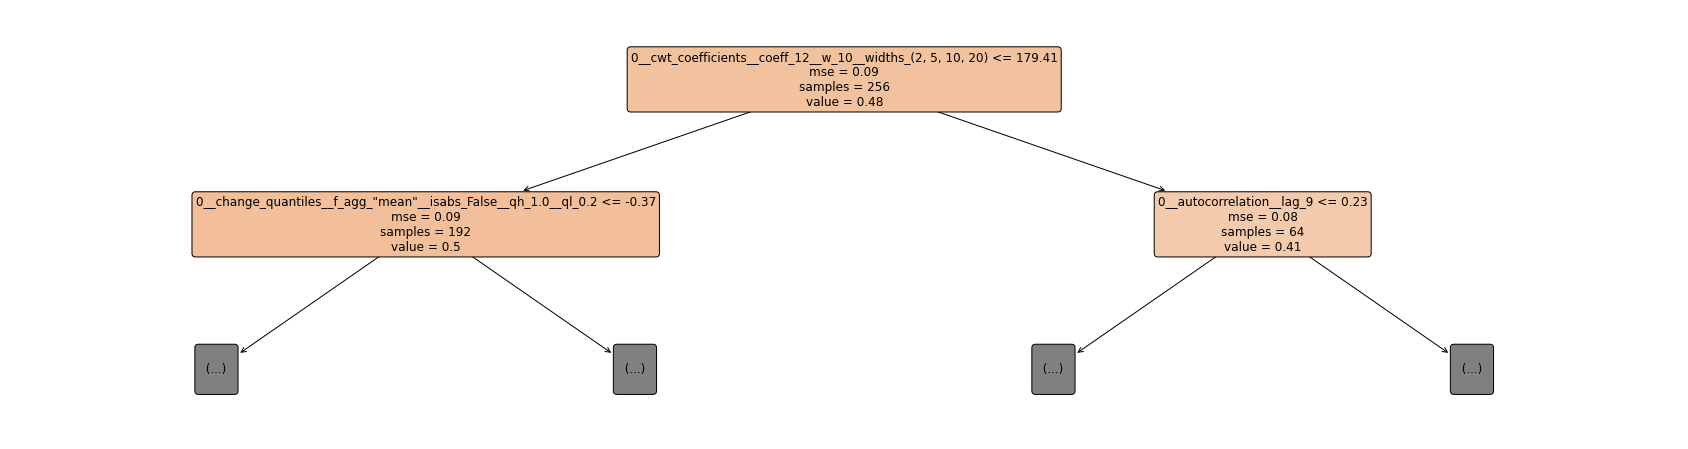

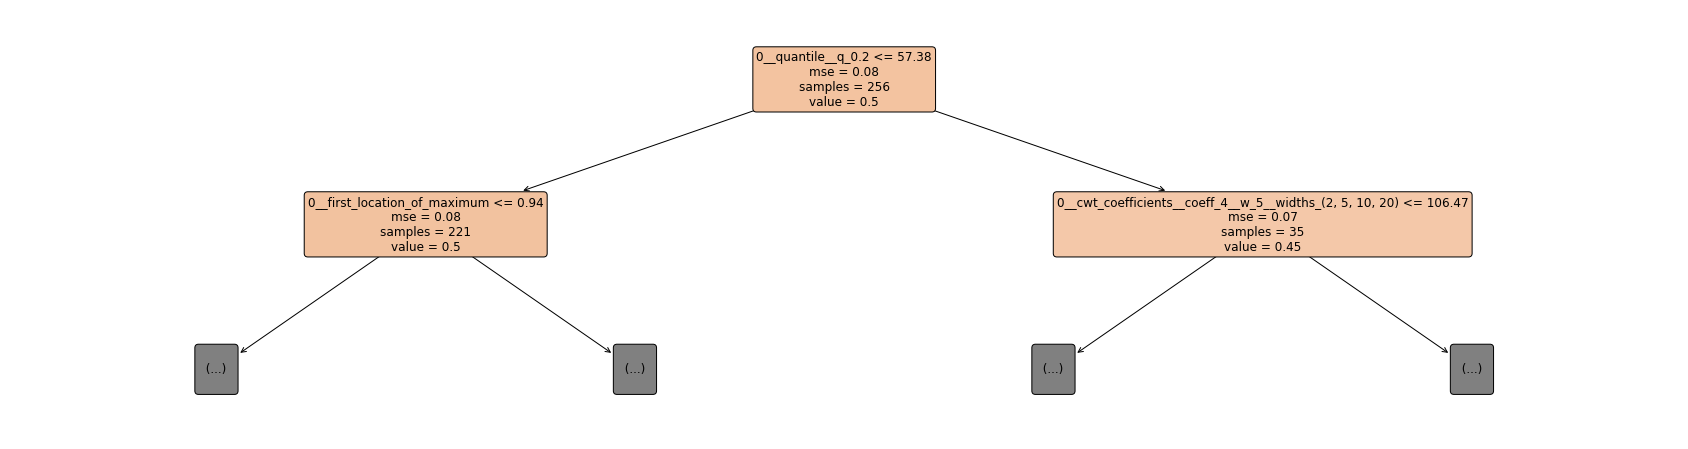

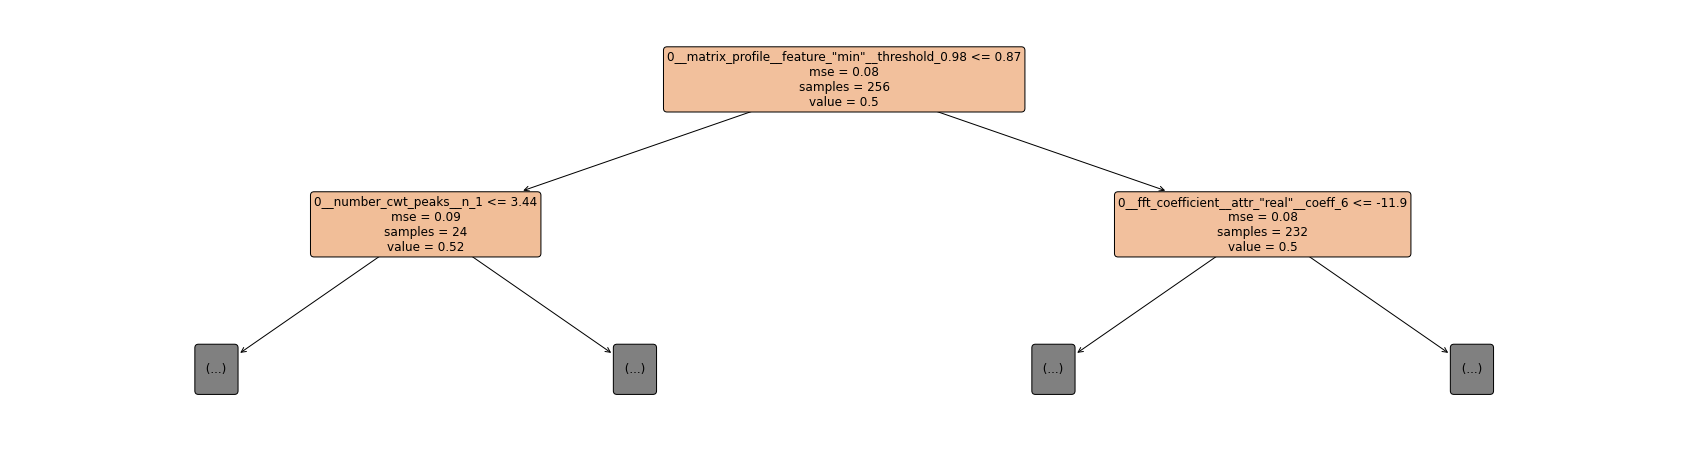

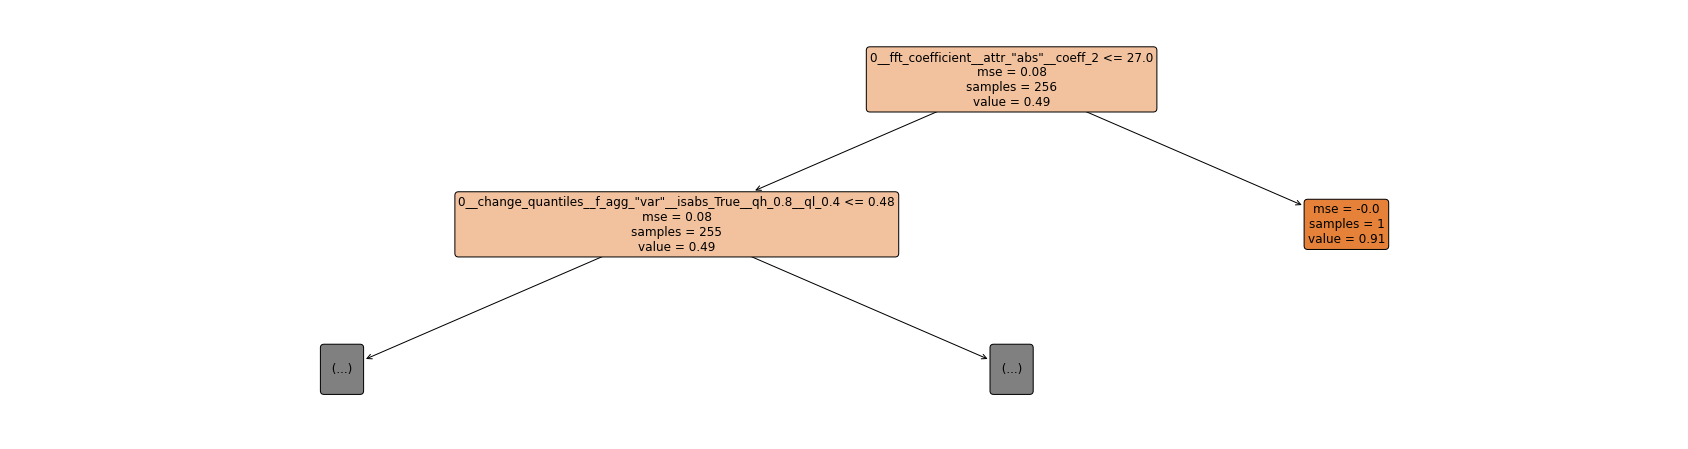

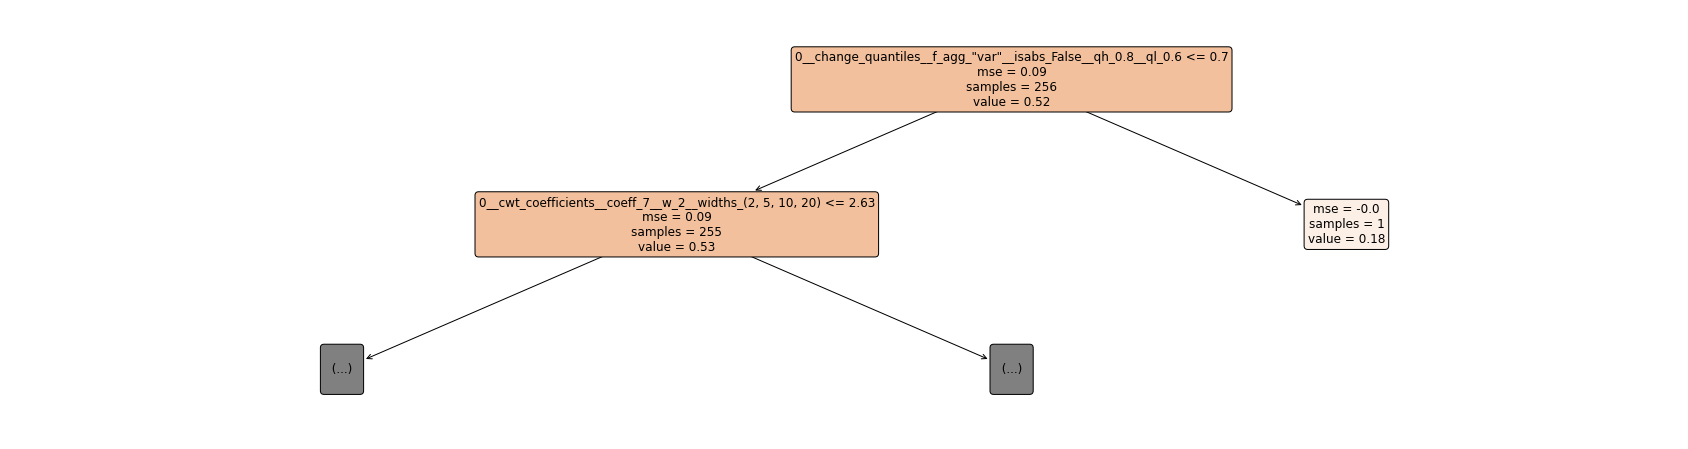

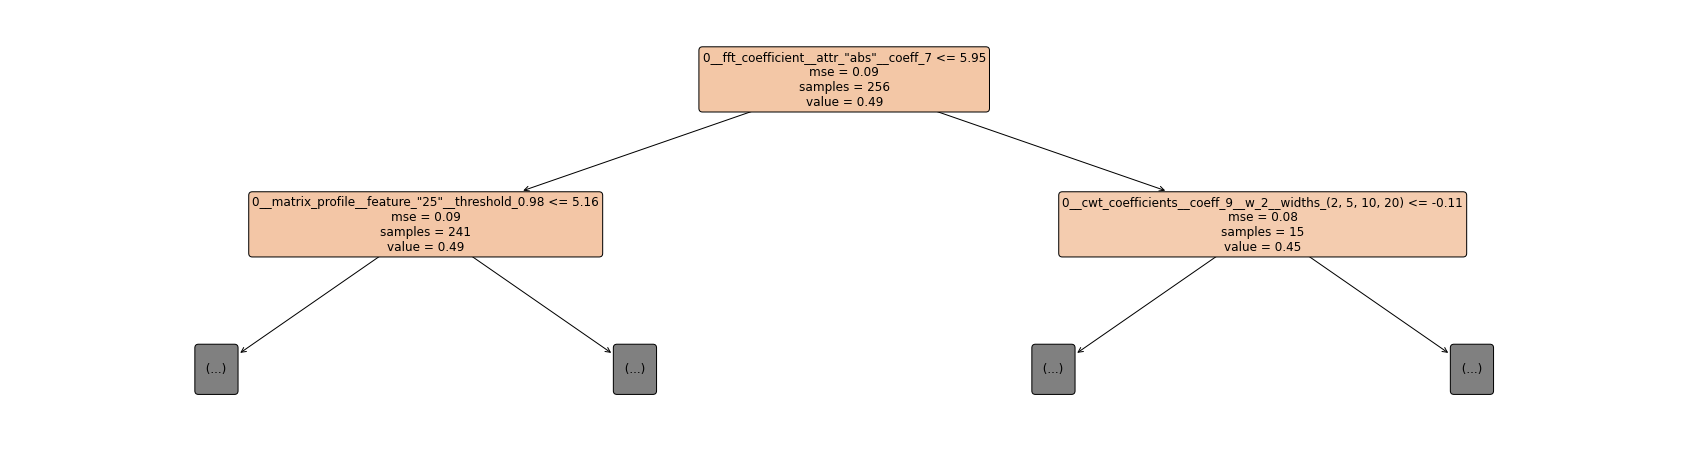

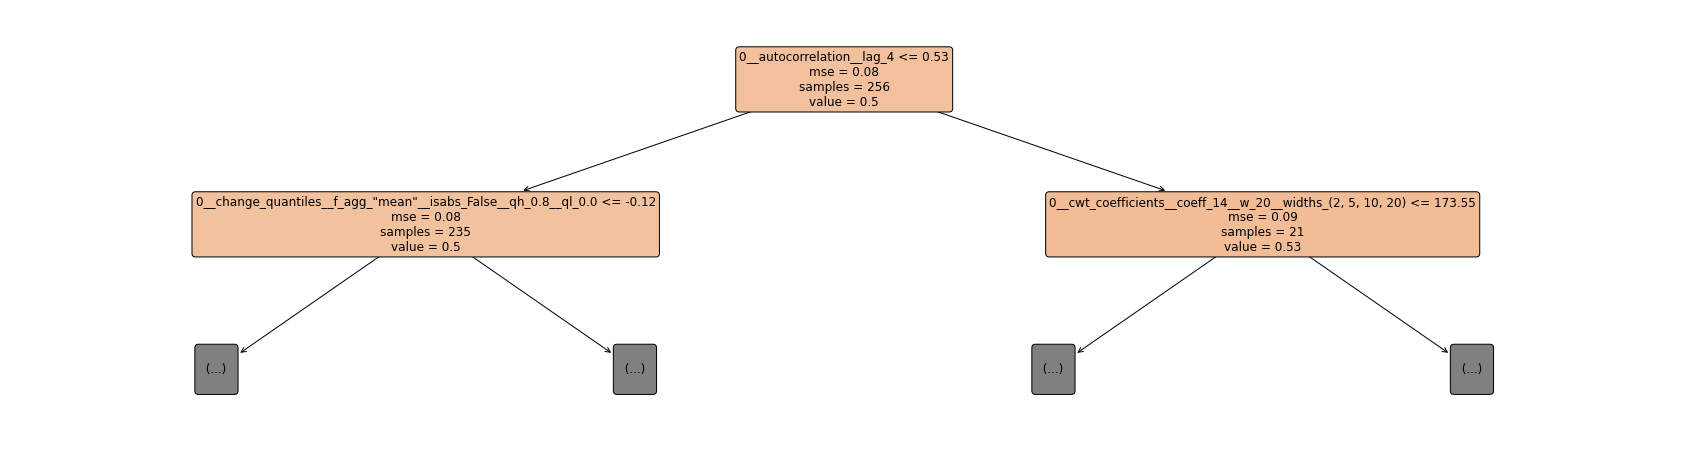

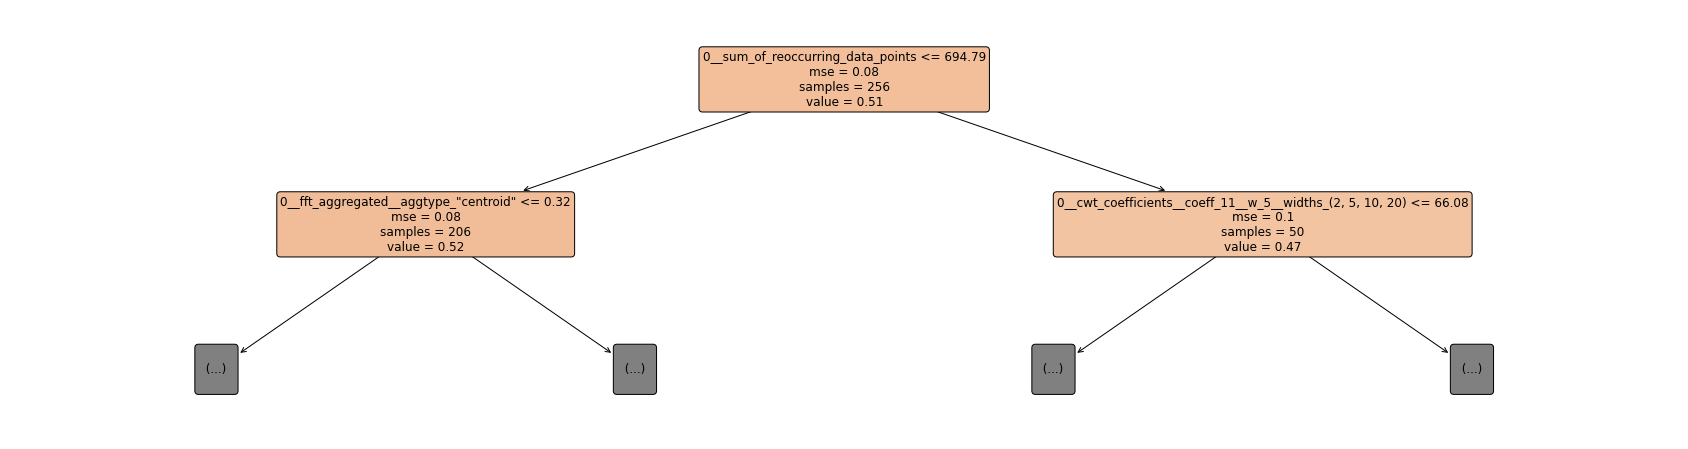

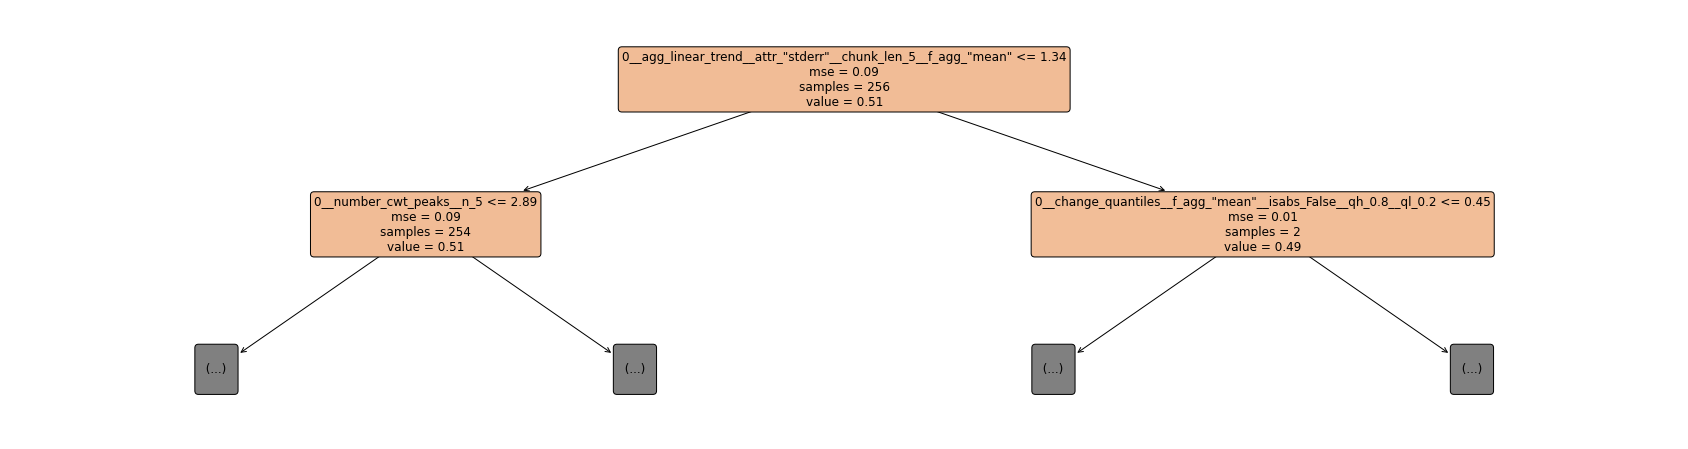

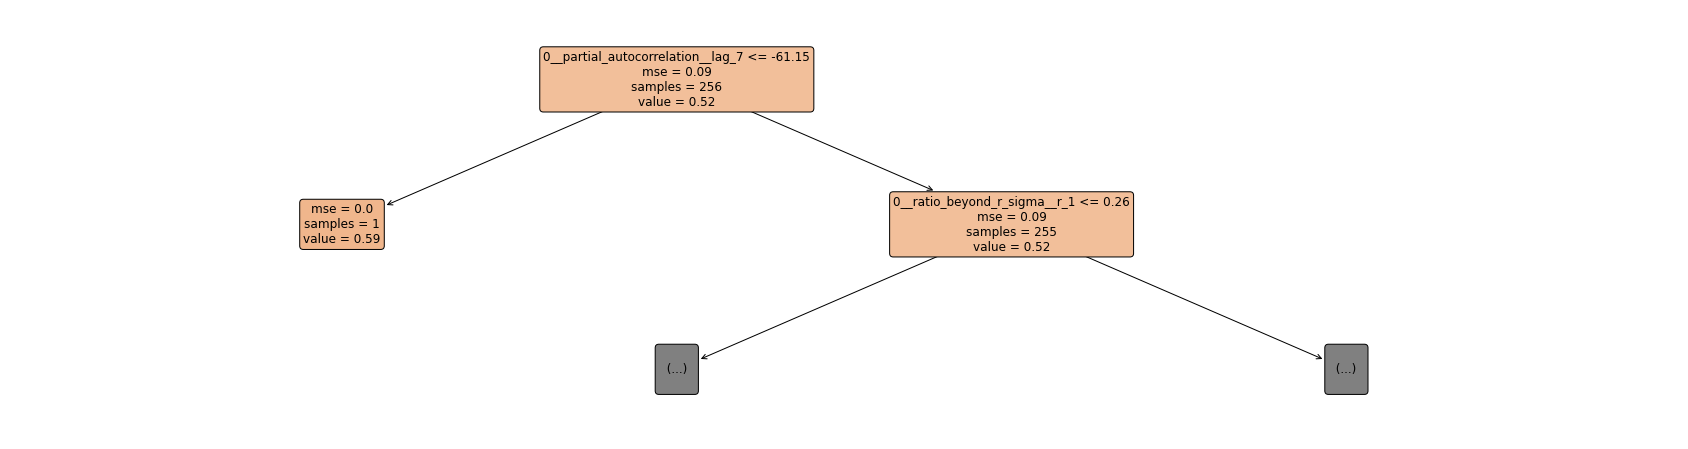

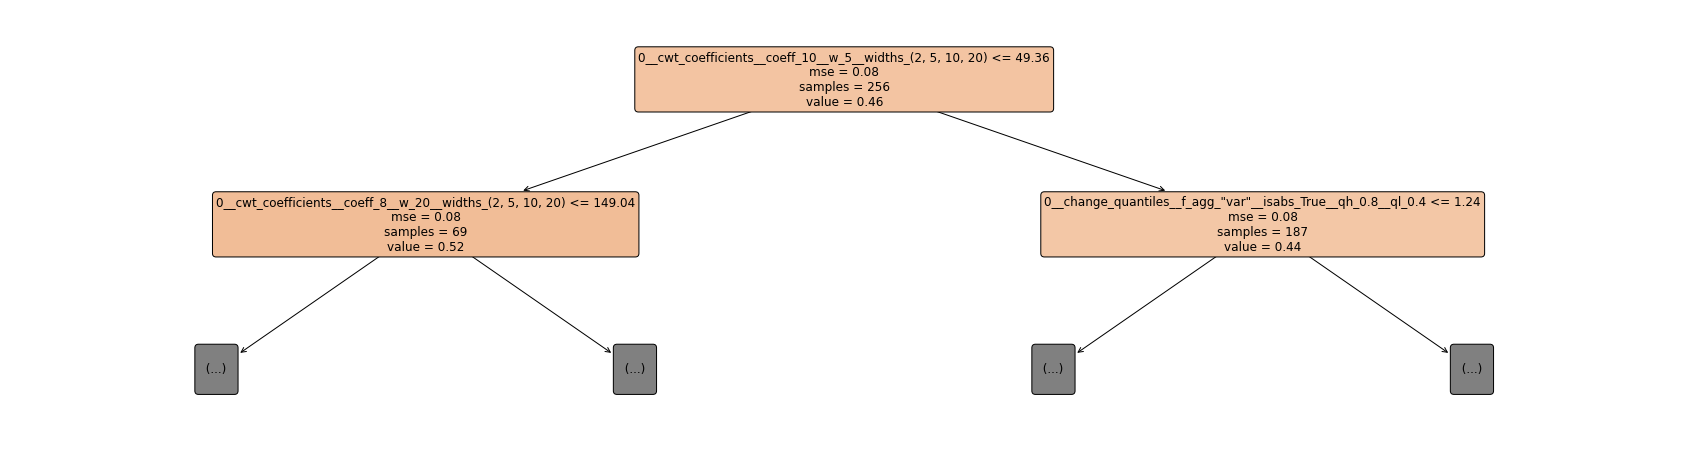

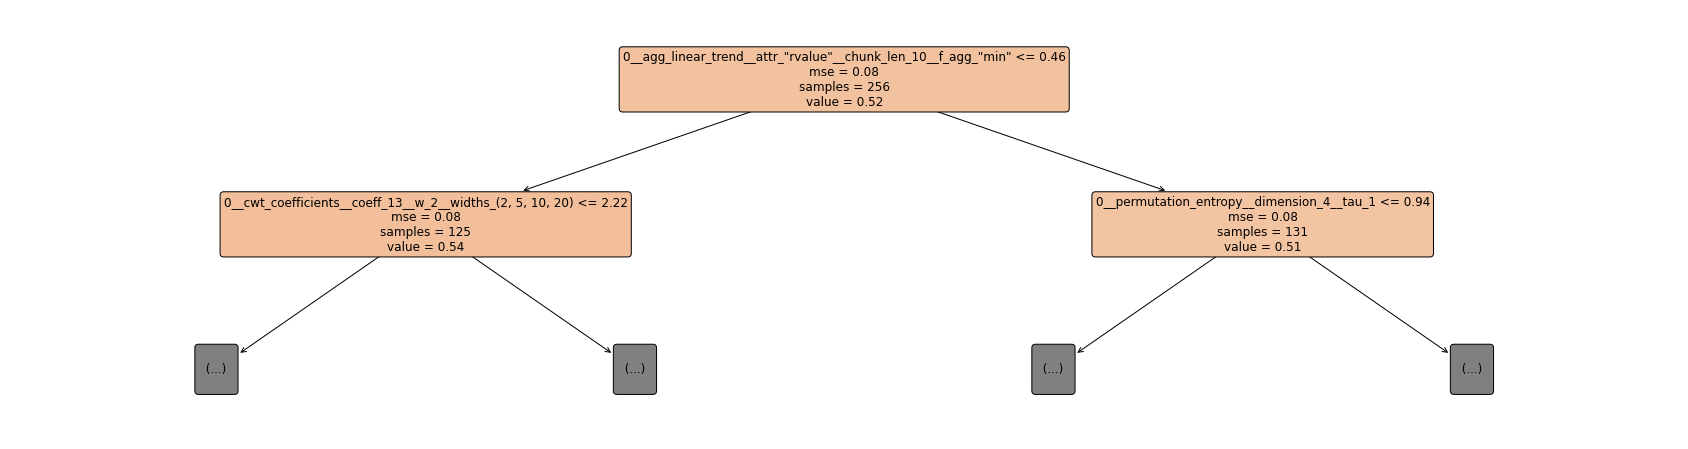

In [20]:
from sklearn.tree import plot_tree
# 決定木リスト（0～99まである）の一番上を選択
for i in range(50):
    estimator = model.estimators_[i]
    # 図のサイズ設定
    plt.figure(figsize=(30, 8))
    # 決定木の可視化
    plot_tree(
            estimator,
            max_depth=1,
            feature_names = df.columns,
            # proportion=True,
            filled=True,
            rounded=True,
            precision=2,
            fontsize=12,
        )
#     dir_name='tree'
#     name=f'tree_{i}.png'
#     plt.savefig(os.path.join(dir_name, name))

In [30]:
cl=list(df.columns)
fts=[ft for ft in cl if 'partial' in ft]
fts

['0__partial_autocorrelation__lag_0',
 '0__partial_autocorrelation__lag_1',
 '0__partial_autocorrelation__lag_2',
 '0__partial_autocorrelation__lag_3',
 '0__partial_autocorrelation__lag_4',
 '0__partial_autocorrelation__lag_5',
 '0__partial_autocorrelation__lag_6',
 '0__partial_autocorrelation__lag_7',
 '0__partial_autocorrelation__lag_8',
 '0__partial_autocorrelation__lag_9']